<a href="https://colab.research.google.com/github/Shyams728/copper_ml_project/blob/main/copper_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
from scipy.stats import skew

In [10]:
Main_df = pd.read_excel(r'/content/drive/MyDrive/data/processed_Copper_Set_cleaned.xlsx')

In [11]:
Main_df.sample(5)

,item_date,quantity_tons,customer_code,country_code,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
174206,2020-07-13,5.637272,30161540,77,Won,W,15,1.20,1250.0,628377,2020-08-01,544.00
149820,2020-09-03,4.964615,30206951,84,Won,W,10,0.90,1250.0,164141591,2020-10-01,733.02
120684,2020-10-19,5.660758,30284310,30,Won,W,10,0.63,1248.0,611993,2020-10-01,1044.25
159873,2020-08-10,49.541334,30157111,78,Not lost for AM,W,41,0.50,1250.0,611993,2020-10-01,850.00
31401,2021-02-25,10.194420,30203189,32,Won,W,40,3.20,950.0,1670798778,2021-04-01,909.00


In [12]:
catagory_columns = ['country_code', 'customer_code', 'application', 'product_ref']
Main_df[catagory_columns] = Main_df[catagory_columns].apply(lambda x: x.astype('category'))

In [13]:
# Display basic information about the dataset
Main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181664 entries, 0 to 181663
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181664 non-null  datetime64[ns]
 1   quantity_tons  181664 non-null  float64       
 2   customer_code  181664 non-null  category      
 3   country_code   181664 non-null  category      
 4   status         181664 non-null  object        
 5   item_type      181664 non-null  object        
 6   application    181664 non-null  category      
 7   thickness      181664 non-null  float64       
 8   width          181664 non-null  float64       
 9   product_ref    181664 non-null  category      
 10  delivery_date  181664 non-null  datetime64[ns]
 11  selling_price  181664 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(4), object(2)
memory usage: 12.0+ MB


In [14]:
# Display descriptive statistics
Main_df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181664,2020-11-26 22:57:40.806764032,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181664.0,5875.235595,0.00001,10.970298,30.364635,67.161335,1000000000.0,2349132.964627
thickness,181664.0,2.564877,0.18,0.7,1.5,3.0,2500.0,6.572458
width,181664.0,1295.292755,1.0,1180.0,1250.0,1500.0,2990.0,261.632547
delivery_date,181664,2021-01-25 22:44:25.598027008,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181664.0,1918.084008,-1160.0,669.0,812.0,953.0,100001015.0,331802.948131


In [15]:
Main_df.describe(include=['category','object']).T

,count,unique,top,freq
customer_code,181664,1169,30157111,4988
country_code,181664,18,78,32084
status,181664,9,Won,116007
item_type,181664,7,W,105611
application,181664,30,10,77561
product_ref,181664,33,611993,45723


In [16]:
df = Main_df.copy()

In [17]:
numeric_columns = df.select_dtypes(include='number',).columns
numeric_columns[0:-1]

Index(['quantity_tons', 'thickness', 'width'], dtype='object')

have glipse of outliers count based on IQR method considaration

In [18]:
print('total number of samples : ',len(df),"\n")


for col in numeric_columns:
    # Count outliers before clipping
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f'outliers from {col} : ',len(outliers))


total number of samples :  181664 

outliers from quantity_tons :  20954
outliers from thickness :  13959
outliers from width :  10948
outliers from selling_price :  4877


size of the outliers are high found out the clipiing outlier still not remove the skiwness of the data
according to previous triels

for selling price outliers are minimal but skiewness to found

For regression targets with outliers, clipping extreme values or winsorizing can improve model fitting. But do this cautiously.

Applying power or log transforms to skewed regression targets can make the relationship more linear and improve predictions.

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


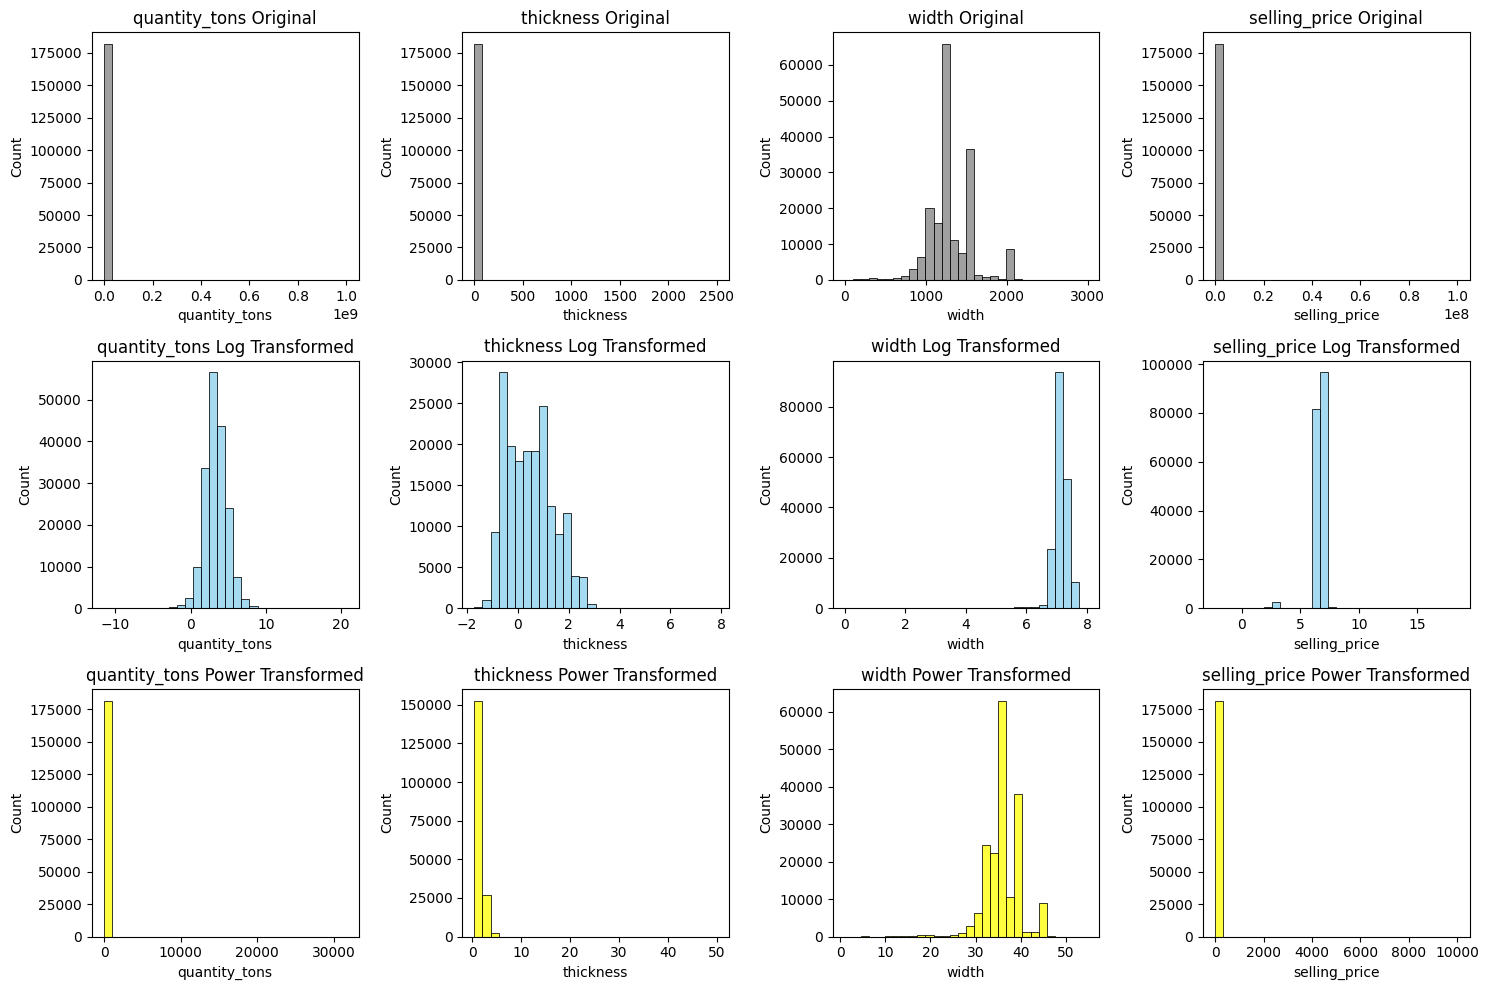

In [19]:
num_plots = len(numeric_columns)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):

    # Plot original histogram
    plt.subplot(3, num_plots, i)
    sns.histplot(df[col], kde=False, bins=30, color='grey')
    plt.title(f'{col} Original')

    # Log transform
    log_data = np.log(df[col])

    # Plot log transformed histogram
    plt.subplot(3, num_plots, num_plots + i)
    sns.histplot(log_data, bins=30, color='skyblue')
    plt.title(f'{col} Log Transformed')

    # Power transform
    power_data = df[col]**(1/2)

    # Plot power transformed histogram
    plt.subplot(3, num_plots, 2*num_plots + i)
    sns.histplot(power_data, bins=30, color='yellow')
    plt.title(f'{col} Power Transformed')

plt.tight_layout()
plt.show()

log transformation will remove heavily skewed data removes long tails

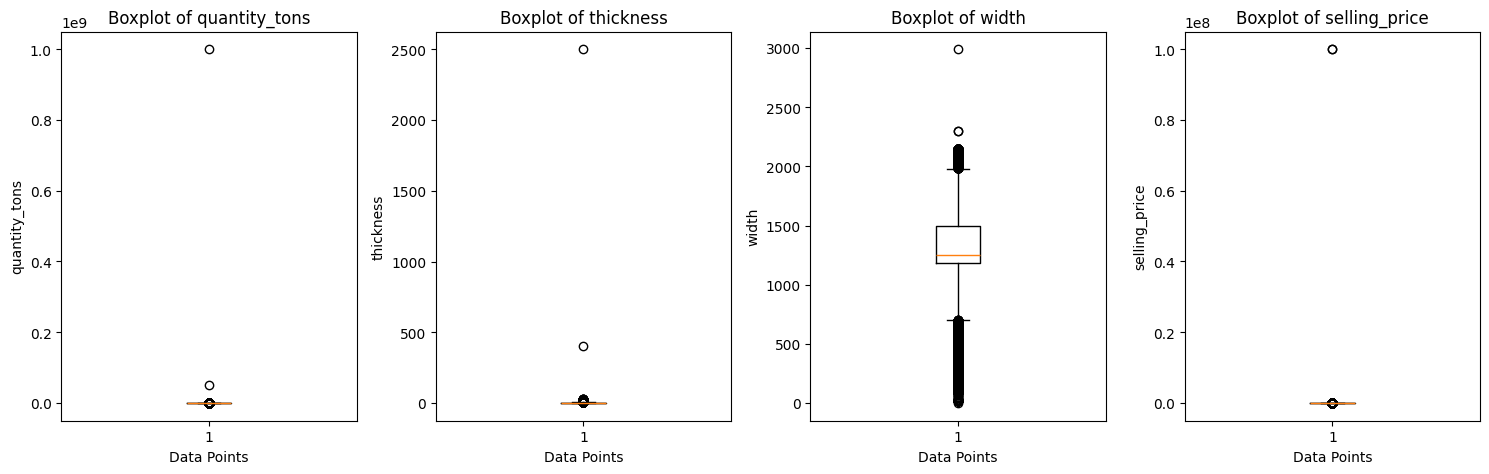

In [20]:
# Create a single figure with subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_columns, 1):  # Start index from 1

    # Plot boxplot
    plt.subplot(1, len(numeric_columns), i)
    plt.boxplot(df[col])
    # plt.violinplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Data Points')
    plt.ylabel(col)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [21]:
for col in numeric_columns:
    # Count and display the number of zero or negative values in the current column
    num_zero_negative_values = (df[col] <= 0).sum()
    print(f'Column "{col}": {num_zero_negative_values} zero or negative values')

    valid_rows = df[col] > 0
    df[f'log_trans_{col}'] = np.log(df.loc[valid_rows, col])


Column "quantity_tons": 0 zero or negative values
Column "thickness": 0 zero or negative values
Column "width": 0 zero or negative values
Column "selling_price": 7 zero or negative values


In [22]:
df.sample(5)

,item_date,quantity_tons,customer_code,country_code,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,log_trans_quantity_tons,log_trans_thickness,log_trans_width,log_trans_selling_price
87174,2020-12-02,33.370344,30346730,26,Won,S,22,1.9,2000.0,164141591,2021-04-01,896.0,3.507668,0.641854,7.600902,6.797940
67742,2021-01-08,434.733507,30147722,78,Won,W,41,0.4,1075.0,611993,2021-03-01,1065.0,6.074733,-0.916291,6.980076,6.970730
123046,2020-10-14,49.391666,30356624,84,Won,W,79,0.9,1500.0,1668701718,2020-10-01,864.0,3.899782,-0.105361,7.313220,6.761573
116041,2020-10-26,77.750928,30157111,78,Not lost for AM,W,41,0.5,1250.0,611993,2020-12-01,899.0,4.353510,-0.693147,7.130899,6.801283
39045,2021-02-15,75.893804,30198586,27,Won,S,59,3.8,1425.0,1670798778,2021-05-01,874.0,4.329335,1.335001,7.261927,6.773080


to know thhe data distribution of numerical data

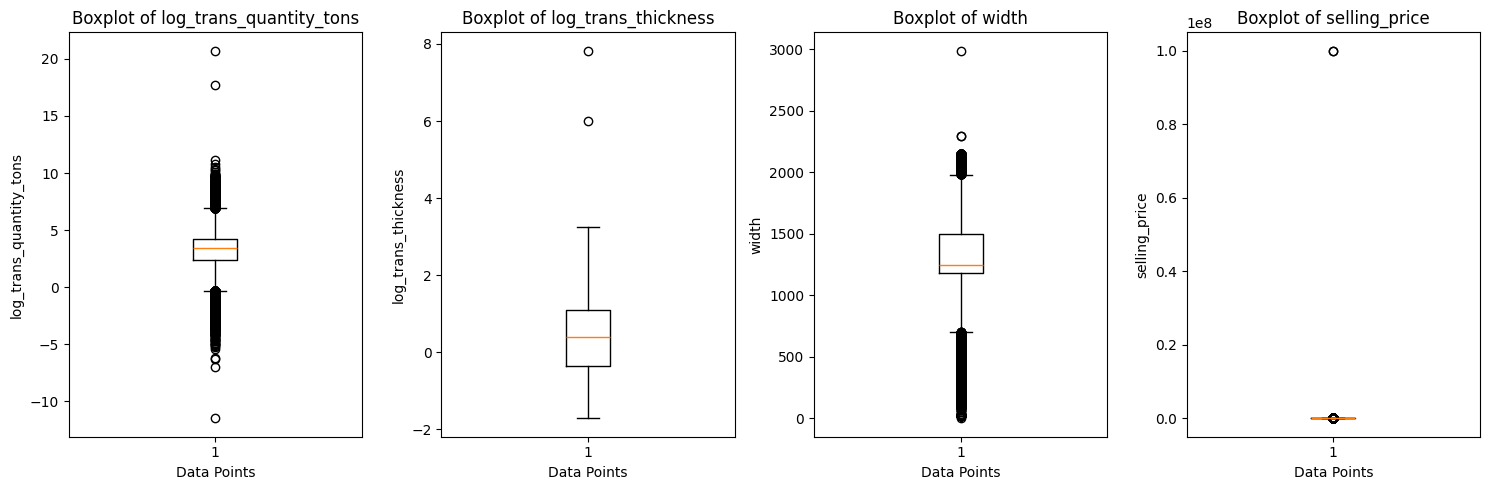

In [23]:
log_tran_col = ['log_trans_quantity_tons',	'log_trans_thickness',	'width',	'selling_price']

# Create a single figure with subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(log_tran_col, 1):  # Start index from 1

    # Plot boxplot
    plt.subplot(1, len(log_tran_col), i)
    plt.boxplot(df[col])
    # plt.violinplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Data Points')
    plt.ylabel(col)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [24]:
# Function to clip values in specified columns based on quantiles and count outliers
def clip_and_count_outliers(df, clip_quantiles):
    # Make a copy of the original DataFrame
    data = df.copy()
    # Dictionary to store outlier information for each numerical column
    outliers = {}
    log_tran_col = ['log_trans_quantity_tons',	'log_trans_thickness',	'width',	'selling_price']
    # Loop through numerical columns in the DataFrame
    for col in log_tran_col:
        # Count outliers before clipping
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        num_outliers_before_clip = len(data[(data[col] > upper_bound) | (data[col] < lower_bound)])

        # Clip values based on specified quantiles
        data[col] = data[col].clip(upper=data[col].quantile(clip_quantiles.get('upper', 1)),
                                   lower=data[col].quantile(clip_quantiles.get('lower', 0)))

        # Count outliers after clipping
        num_outliers_after_clip = len(data[(data[col] > upper_bound) | (data[col] < lower_bound)])

        # Calculate percentage of outliers before clipping
        percent_outliers_before_clip = (num_outliers_before_clip / len(data)) * 100

        # Calculate percentage of outliers after clipping
        percent_outliers_after_clip = (num_outliers_after_clip / len(data)) * 100

        # Store outlier information in the dictionary
        outliers[col] = {
            'count_before_clip': num_outliers_before_clip,
            'percent_before_clip': f'{percent_outliers_before_clip:.2f}%',  # Include percentage before clip
            'count_after_clip': num_outliers_after_clip,
            'percent_after_clip': f'{percent_outliers_after_clip:.2f}%'  # Include percentage after clip
        }

    # Return the clipped DataFrame and the outliers information
    return data, outliers

# Function to remove outliers using Isolation Forest
def remove_outliers_isolation_forest(df, contamination=0.05):
    # Make a copy of the original DataFrame
    data = df.copy()
    # Dictionary to store outlier information for each numerical column
    outliers = {}

    # Isolation Forest for outlier detection
    for col in log_tran_col:
        # Fit the Isolation Forest model to the numeric column
        model = IsolationForest(contamination=contamination)
        model.fit(data[[col]])

        # Identify outliers
        outliers_before_removal = model.predict(data[[col]]) == -1
        num_outliers_before_removal = sum(outliers_before_removal)

        # Remove outliers
        data = data[~outliers_before_removal]

        # Identify outliers after removal
        outliers_after_removal = model.predict(data[[col]]) == -1
        num_outliers_after_removal = sum(outliers_after_removal)

        # Store outlier information in the dictionary
        outliers[col] = {
            'count_before_removal': num_outliers_before_removal,
            'percent_before_removal': f'{(num_outliers_before_removal / len(df)) * 100:.2f}%',
            'count_after_removal': num_outliers_after_removal,
            'percent_after_removal': f'{(num_outliers_after_removal / len(data)) * 100:.2f}%'
        }

    # Return the DataFrame after removing outliers and the outliers information
    return data, outliers


In [25]:
print('total number of samples : ',len(df))

total number of samples :  181664


Isolation Forest is most robost unsupervised learning method use isolation forests to find anomalies and remove only the most extreme outliers

In [26]:
# Remove outliers using Isolation Forest
contamination = 0.01
filtered_data, outliers_info_iso = remove_outliers_isolation_forest(df, contamination)


print("Isolation Forest:")
for col, info in outliers_info_iso.items():
    print(f"{col}:")
    print(f"Count of outliers before removal: {info['count_before_removal']}")
    print(f"Percentage of outliers before removal: {info['percent_before_removal']}")
    print(f"Count of outliers after removal: {info['count_after_removal']}")
    print(f"Percentage of outliers after removal: {info['percent_after_removal']}")
    print()

Isolation Forest:
log_trans_quantity_tons:
Count of outliers before removal: 1810
Percentage of outliers before removal: 1.00%
Count of outliers after removal: 0
Percentage of outliers after removal: 0.00%

log_trans_thickness:
Count of outliers before removal: 1791
Percentage of outliers before removal: 0.99%
Count of outliers after removal: 0
Percentage of outliers after removal: 0.00%

width:
Count of outliers before removal: 1750
Percentage of outliers before removal: 0.96%
Count of outliers after removal: 0
Percentage of outliers after removal: 0.00%

selling_price:
Count of outliers before removal: 1689
Percentage of outliers before removal: 0.93%
Count of outliers after removal: 0
Percentage of outliers after removal: 0.00%



In [27]:
# Clip outliers using IQR
clip_quantiles = {'upper': 0.90, 'lower': 0.01}
clipped_data, outliers_info_clip = clip_and_count_outliers(filtered_data, clip_quantiles)

# Display outliers information for both methods
print("IQR Clipping:")
for col, info in outliers_info_clip.items():
    print(f"{col}:")
    print(f"Count of outliers before clip: {info['count_before_clip']}")
    print(f"Percentage of outliers before clip: {info['percent_before_clip']}")
    print(f"Count of outliers after clip: {info['count_after_clip']}")
    print(f"Percentage of outliers after clip: {info['percent_after_clip']}")
    print()

IQR Clipping:
log_trans_quantity_tons:
Count of outliers before clip: 2560
Percentage of outliers before clip: 1.47%
Count of outliers after clip: 0
Percentage of outliers after clip: 0.00%

log_trans_thickness:
Count of outliers before clip: 0
Percentage of outliers before clip: 0.00%
Count of outliers after clip: 0
Percentage of outliers after clip: 0.00%

width:
Count of outliers before clip: 9037
Percentage of outliers before clip: 5.18%
Count of outliers after clip: 0
Percentage of outliers after clip: 0.00%

selling_price:
Count of outliers before clip: 2934
Percentage of outliers before clip: 1.68%
Count of outliers after clip: 1763
Percentage of outliers after clip: 1.01%



stratify is balencing
k-fold cross validation
smoot
dt models are not sensitive to outliers
central something thiorem

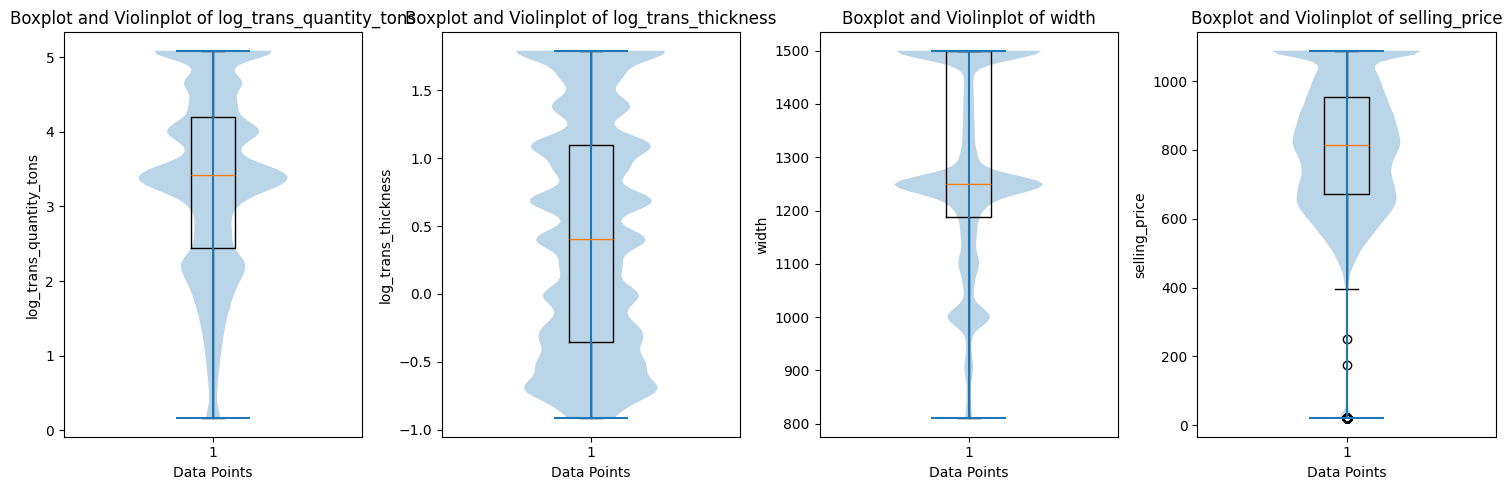

In [28]:

# Visualize the data distribution after cleanign
# Create a single figure with subplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(log_tran_col, 1):  # Start index from 1
    plt.subplot(1, len(log_tran_col), i)
    plt.boxplot(clipped_data[col])
    plt.violinplot(clipped_data[col])
    plt.title(f'Boxplot and Violinplot of {col}')
    plt.xlabel('Data Points')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

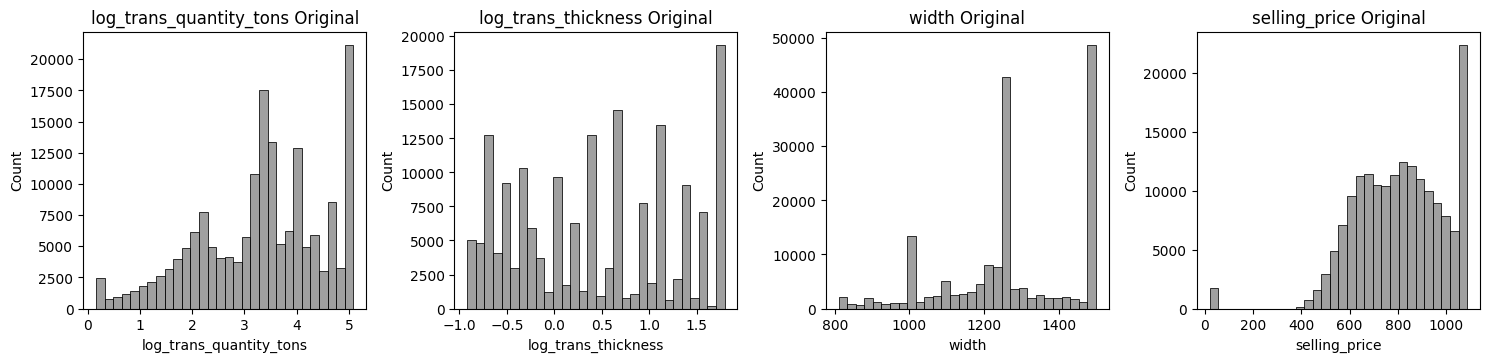

In [29]:
num_plots = len(log_tran_col)

plt.figure(figsize=(15, 10))
for i, col in enumerate(log_tran_col, 1):

    # Plot original histogram
    plt.subplot(3, num_plots, i)
    sns.histplot(clipped_data[col], kde=False, bins=30, color='grey')
    plt.title(f'{col} Original')

plt.tight_layout()
plt.show()

In [30]:
clipped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174624 entries, 0 to 181663
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   item_date                174624 non-null  datetime64[ns]
 1   quantity_tons            174624 non-null  float64       
 2   customer_code            174624 non-null  category      
 3   country_code             174624 non-null  category      
 4   status                   174624 non-null  object        
 5   item_type                174624 non-null  object        
 6   application              174624 non-null  category      
 7   thickness                174624 non-null  float64       
 8   width                    174624 non-null  float64       
 9   product_ref              174624 non-null  category      
 10  delivery_date            174624 non-null  datetime64[ns]
 11  selling_price            174624 non-null  float64       
 12  log_trans_quantity_to

In [31]:
dfc = df[df['status'].isin(['Won', 'Lost'])]
len(dfc)

150443

In [32]:
clipped_data.corr()

ValueError: could not convert string to float: 'Won'

In [ ]:

# Calculate correlation matrix
corr = clipped_data.corr()

# Generate heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            fmt='.2f')

# Decorations
plt.title('Correlation Matrix for Clipped Data')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

In [ ]:
print(filtered_data['item_date'].describe())
df['item_date'].hist()


In [ ]:

# Temporal Trends for 'item_date'
plt.subplot(1, 2, 1)
df.set_index('item_date')['selling_price'].plot(figsize=(10, 4))
plt.title('Temporal Trends - item_date')

# Temporal Trends for 'delivery_date'
plt.subplot(1, 2, 2)
df.set_index('delivery_date')['selling_price'].plot(figsize=(10, 4))
plt.title('Temporal Trends - delivery_date')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


In [ ]:
#Group by year and month for 'delivery_date', then calculate the mean
grouped_data_delivery = df.groupby([df['delivery_date'].dt.year, df['delivery_date'].dt.month])['selling_price'].mean()

# Group by year and month for 'item_date', then calculate the mean
grouped_data_item = df.groupby([df['item_date'].dt.year, df['item_date'].dt.month])['selling_price'].mean()

# Plotting both lines on the same graph with different colors
plt.figure(figsize=(12, 6))
grouped_data_delivery.plot(kind='bar', color='blue', label='Delivery Date')
grouped_data_item.plot(kind='bar', color='orange', label='Item Date')

plt.title('Average Value by Year and Month')
plt.xlabel('(Year, Month)')
plt.ylabel('Average Selling Price')
plt.legend()
plt.show()

In [ ]:

from scipy.stats import pearsonr


# Calculate the correlation between 'item_date' and 'selling_price'
corr_item_date, _ = pearsonr(df['item_date'].astype(int), df['selling_price'])

# Calculate the correlation between 'delivery_date' and 'selling_price'
corr_delivery_date, _ = pearsonr(df['delivery_date'].astype(int), df['selling_price'])

# Print correlation coefficients
print(f"Correlation between 'item_date' and 'selling_price': {corr_item_date:.2f}")
print(f"Correlation between 'delivery_date' and 'selling_price': {corr_delivery_date:.2f}")

# Plotting (if needed)
plt.figure(figsize=(10, 4))
sns.scatterplot(x='item_date', y='selling_price', data=df, label='Item Date')
sns.scatterplot(x='delivery_date', y='selling_price', data=df, label='Delivery Date')
plt.title('Correlation between Dates and Selling Price')
plt.legend()
plt.show()


In [ ]:
# Visualize distribution of numerical columns
numeric_cols = filtered_data.select_dtypes(include=[np.number]).columns
filtered_data[numeric_cols].hist(bins=15, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Columns', y=0.92)
plt.show()


In [ ]:
# Visualize relationships between numerical variables
sns.pairplot(filtered_data[numeric_cols].head(5000))
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

In [ ]:
df1 = filtered_data.copy()

In [ ]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great
# effect on the data, so no need to apply for that columns

df1['quantity_tons'] = np.log(filtered_data['quantity_tons'])
sns.v(x='quantity_tons', data=df1)
plt.show()

df1['width'] = np.log(filtered_data['width'])
sns.boxplot(x='width', data=df1)
plt.show()

df1['selling_price'] = np.log(filtered_data['selling_price'])
sns.boxplot(x='selling_price', data=df1)
plt.show()

df1['thickness'] = np.log(filtered_data['thickness'])
sns.boxplot(x='thickness', data=df1)
plt.show()

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object','category']).columns

# Display the list of categorical columns
print("Categorical Columns:", categorical_cols)


In [ ]:

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Count Plots for Categorical Columns', fontsize=16)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plot count plots for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent title from being cut off
plt.show()


In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_data.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quantity_tons', data=filtered_data)
plt.title('Box Plot of Quantity (tons)')
plt.show()

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='quantity_tons', data=filtered_data)
plt.title('Violin Plot of Quantity (tons)')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(filtered_data['quantity_tons'], bins=20, edgecolor='black')
plt.title('Histogram of Quantity (tons)')
plt.xlabel('Quantity (tons)')
plt.ylabel('Frequency')
plt.show()


In [ ]:


# Function to treat outliers using IQR or Isolation Forest
def treat_outliers(data, method='iqr'):
    if method == 'iqr':
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_outliers_removed = data[(data >= lower_bound) & (data <= upper_bound)]
    elif method == 'isolation_forest':
        clf = IsolationForest(contamination=0.05, random_state=42)
        data = data.values.reshape(-1, 1)
        outliers = clf.fit_predict(data)
        data_outliers_removed = data[outliers == 1].reshape(1, -1)[0]
    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'isolation_forest'")
    return data_outliers_removed

# Function to identify and treat skewness using log transformation
def treat_skewness(data):
    skewed_cols = data.apply(lambda x: skew(x))
    skewed_cols = skewed_cols[abs(skewed_cols) > 0.5]  # Adjust the threshold as needed

    for col in skewed_cols.index:
        data[col] = np.log1p(data[col])

# Identify and treat skewness using log transformation
treat_skewness(df)
# Example usage:
# Assuming 'df' is your DataFrame

# Treat outliers using IQR
df_cleaned_iqr = df.apply(treat_outliers, method='iqr')

# Treat outliers using Isolation Forest
df_cleaned_isolation_forest = df.apply(treat_outliers, method='isolation_forest')



# Now, 'df' contains the cleaned data with outliers treated and skewness reduced.


# Task
Check for missing values in the `clipped_data` DataFrame to ensure data completeness after all cleaning steps. Then, for all categorical columns in `clipped_data`, generate count plots and display value counts to understand their distributions. Next, visualize the relationship between each categorical feature and `selling_price` using box plots to identify how different categories influence the target variable.

## Check for Missing Values

### Subtask:
Explicitly check for any missing values in the `clipped_data` DataFrame to ensure data completeness after all cleaning steps.


**Reasoning**:
The subtask explicitly asks to check for missing values in the `clipped_data` DataFrame. Using `.isnull().sum()` is the standard and most direct way to achieve this, providing a count of missing values per column.



In [ ]:
print("Missing values in clipped_data DataFrame:")
print(clipped_data.isnull().sum())

**Reasoning**:
The next step is to identify categorical columns in the `clipped_data` DataFrame to prepare for generating count plots, displaying value counts, and creating box plots against the `selling_price`.



## Re-execute Check for Missing Values

### Subtask:
Re-execute the cell that checks for missing values in `clipped_data` as the DataFrame is now correctly initialized after previous fixes.


**Reasoning**:
The subtask explicitly asks to re-execute the cell that checks for missing values in the `clipped_data` DataFrame. This will confirm the data completeness after the cleaning steps.



In [33]:
print("Missing values in clipped_data DataFrame:")
print(clipped_data.isnull().sum())

Missing values in clipped_data DataFrame:
item_date                  0
quantity_tons              0
customer_code              0
country_code               0
status                     0
item_type                  0
application                0
thickness                  0
width                      0
product_ref                0
delivery_date              0
selling_price              0
log_trans_quantity_tons    0
log_trans_thickness        0
log_trans_width            0
log_trans_selling_price    0
dtype: int64


**Reasoning**:
The subtask requests to identify categorical columns in `clipped_data` to prepare for plotting and value counts. Using `select_dtypes(include=['object', 'category'])` is the correct method to find these columns.



In [34]:
categorical_cols = clipped_data.select_dtypes(include=['object','category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['customer_code', 'country_code', 'status', 'item_type', 'application',
       'product_ref'],
      dtype='object')


**Reasoning**:
To understand the distribution of each categorical column, it is essential to display their value counts. This provides a quantitative summary of the unique values and their frequencies, which complements the visual representation from count plots.



In [35]:
print("Value Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(clipped_data[col].value_counts())


Value Counts for Categorical Columns:

--- customer_code ---
customer_code
30157111    4730
30161088    3700
30201846    3143
30165529    2673
30202938    2526
            ... 
30293258       0
30292608       0
30202916       0
30214608       0
30218033       0
Name: count, Length: 1169, dtype: int64

--- country_code ---
country_code
78     31025
26     25844
25     22514
27     20975
32     17726
28     15262
84     12468
77      9253
30      8386
39      3558
79      2669
38      1691
40      1657
80       792
113      696
89        90
44        15
107        3
Name: count, dtype: int64

--- status ---
status
Won                111865
Lost                33700
Not lost for AM     19033
Revised              4190
To be approved       4011
Draft                1761
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

--- item_type ---
item_type
W         101156
S          67268
PL          5152
Others       541
WI           480
IPL   

**Reasoning**:
To visually understand the distribution of each categorical column, generating count plots is an effective way. This will provide insights into the frequency of each category within the dataset.



/tmp/ipython-input-744511678.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=clipped_data, order=clipped_data[col].value_counts().index, palette='viridis')
/tmp/ipython-input-744511678.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=clipped_data, order=clipped_data[col].value_counts().index, palette='viridis')
/tmp/ipython-input-744511678.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=clipped_data, order=clipped_data[col].value_counts().index, palette='viridis')
/tmp/ipython-input-744

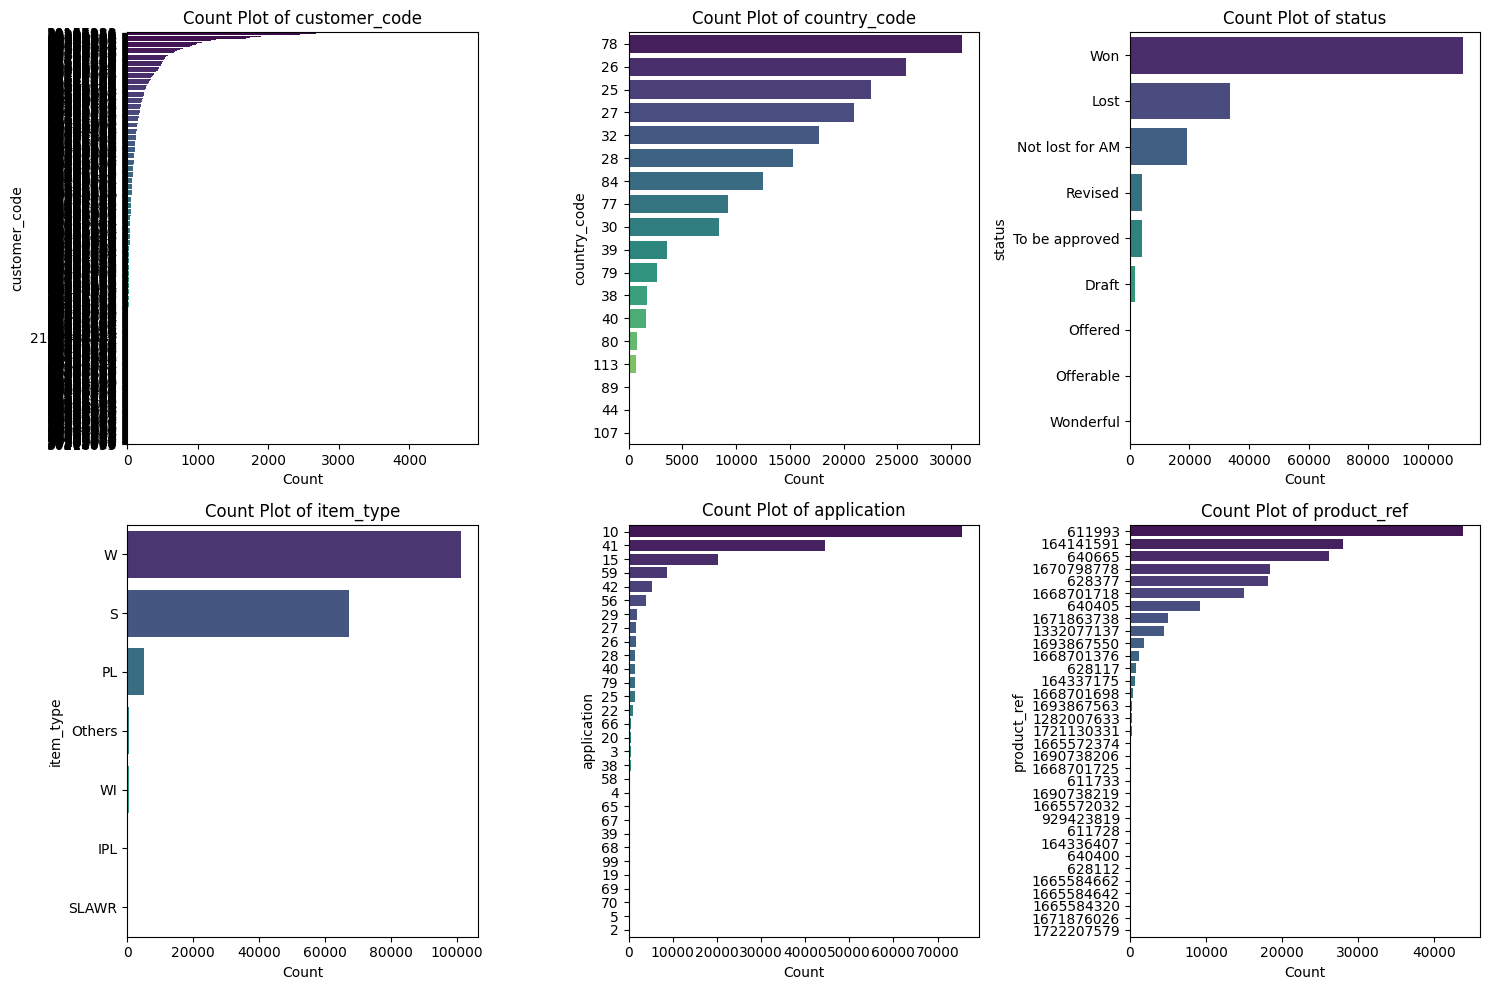

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of rows and columns for the subplot grid
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3 # Roughly 3 plots per row

plt.figure(figsize=(15, num_rows * 5)) # Adjust figure size dynamically

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.countplot(y=col, data=clipped_data, order=clipped_data[col].value_counts().index, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` related to the `palette` argument in `sns.countplot` when `hue` is not explicitly set. To resolve this warning and maintain the intended visualization of category counts, the `palette` argument will be removed. Alternatively, to avoid the FutureWarning and maintain the visual aesthetic, we can explicitly set `color='viridis'` which achieves a similar effect for a single-variable countplot without triggering the warning.



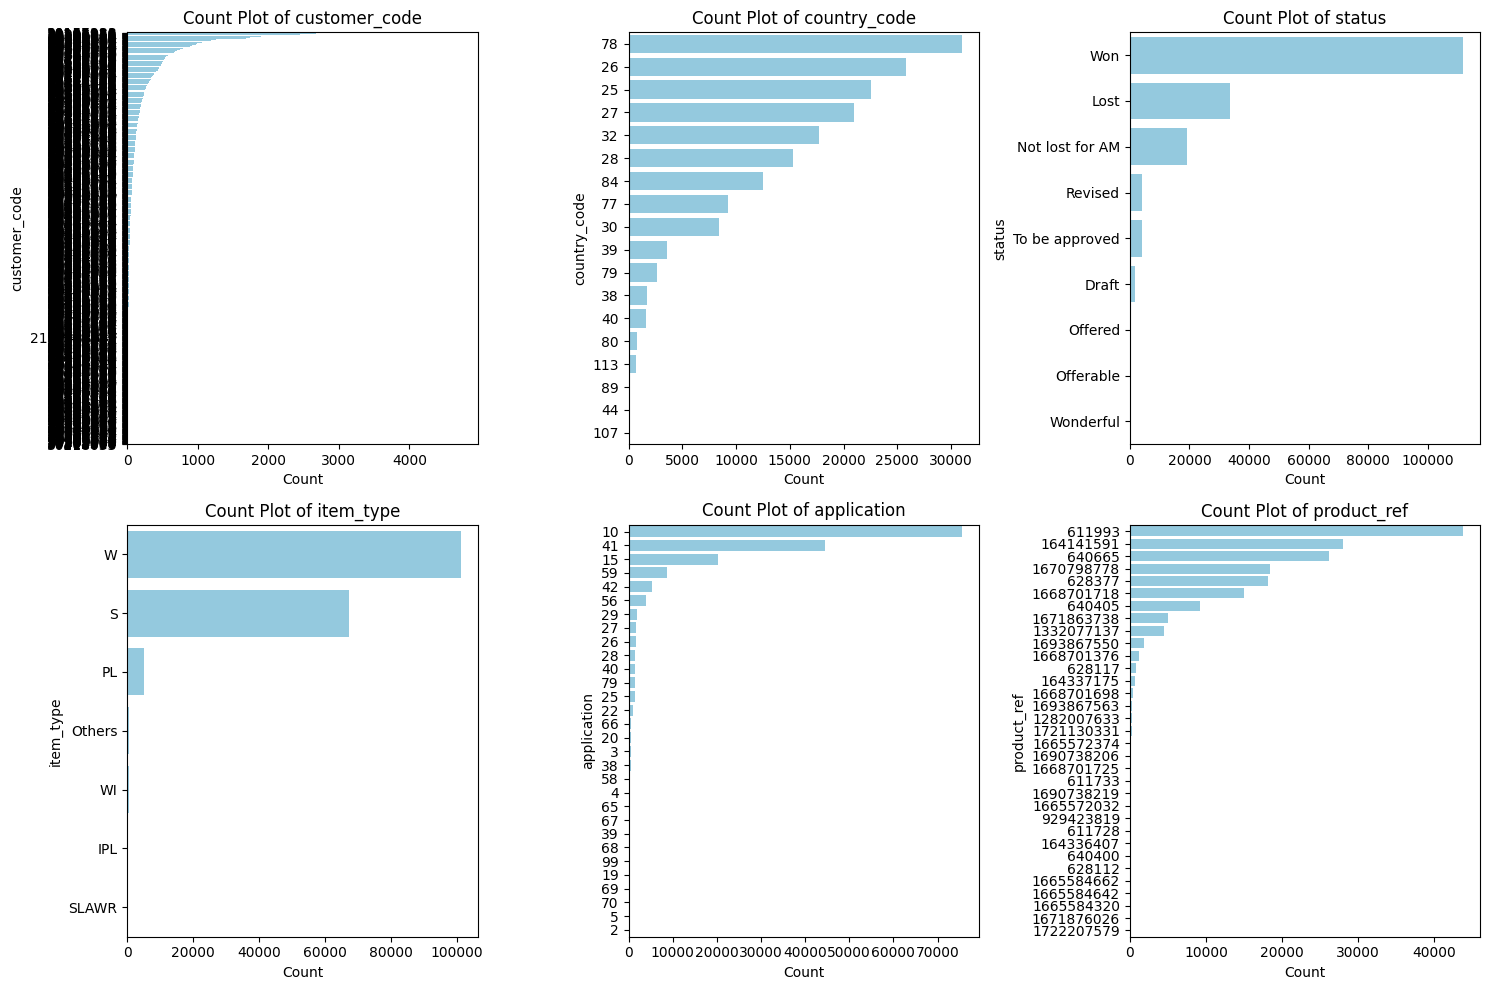

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of rows and columns for the subplot grid
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3 # Roughly 3 plots per row

plt.figure(figsize=(15, num_rows * 5)) # Adjust figure size dynamically

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.countplot(y=col, data=clipped_data, order=clipped_data[col].value_counts().index, color='skyblue')
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Reasoning**:
To understand how different categories influence the target variable, `selling_price`, creating box plots for each categorical feature against `selling_price` is necessary. This will visually represent the distribution of `selling_price` within each category.



/tmp/ipython-input-3741437551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='selling_price', data=clipped_data, palette='viridis')
/tmp/ipython-input-3741437551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='selling_price', data=clipped_data, palette='viridis')
/tmp/ipython-input-3741437551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='selling_price', data=clipped_data, palette='viridis')
/tmp/ipython-input-3741437551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

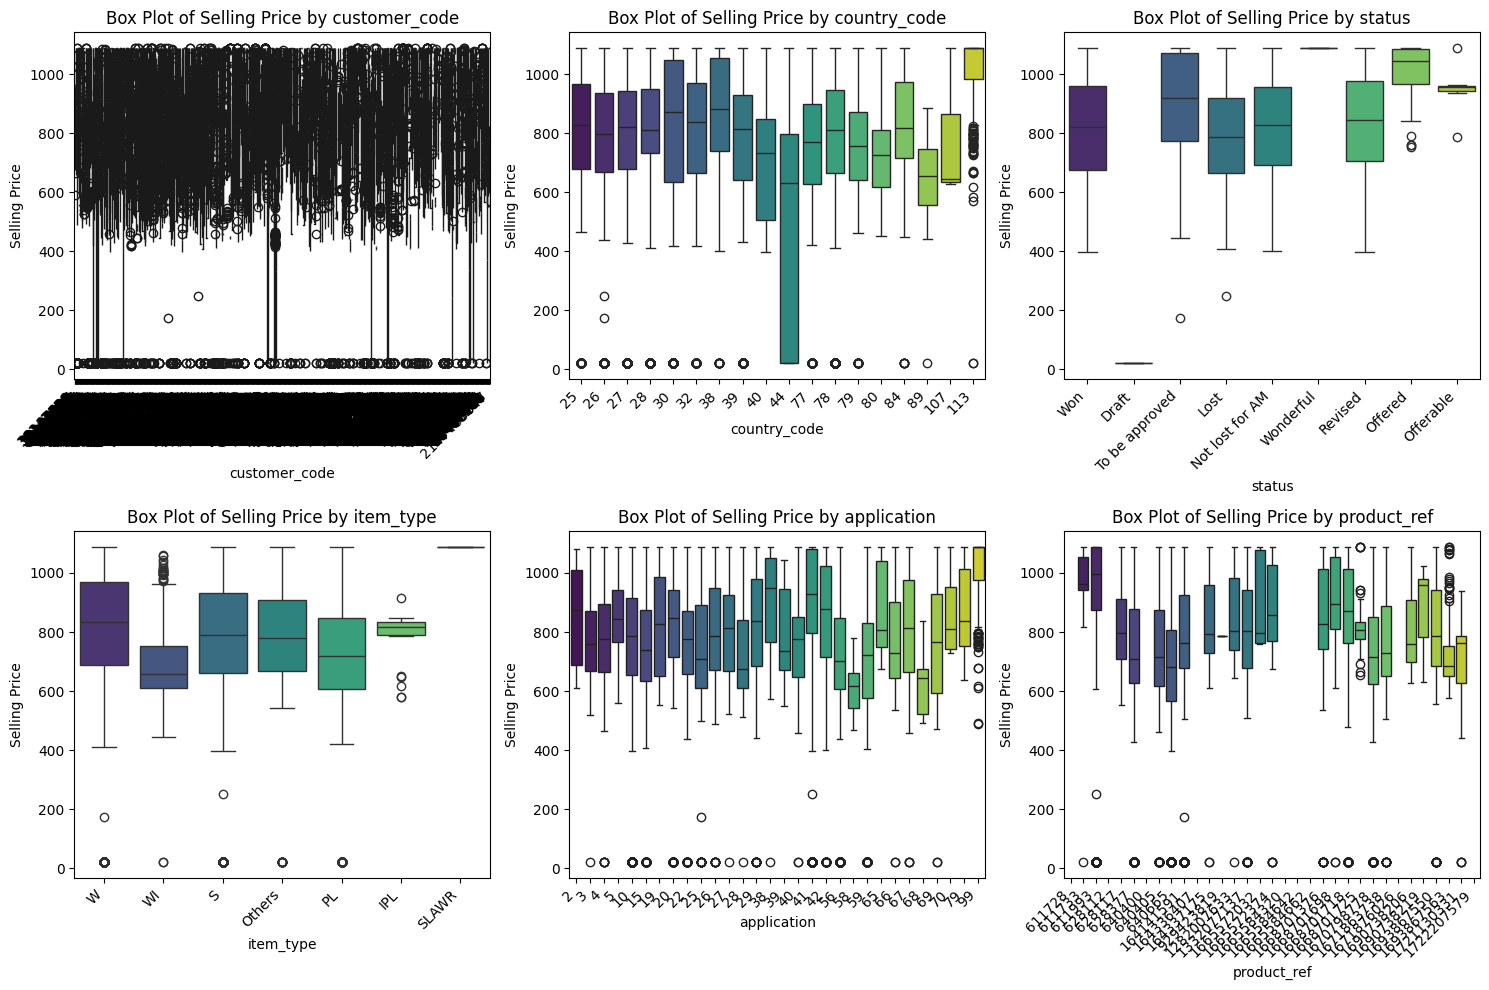

In [38]:
plt.figure(figsize=(15, num_rows * 5)) # Adjust figure size dynamically

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=col, y='selling_price', data=clipped_data, palette='viridis')
    plt.title(f'Box Plot of Selling Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Selling Price')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` related to the `palette` argument in `sns.boxplot` when `hue` is not explicitly set. To resolve this warning and maintain a visual aesthetic, the `palette` argument will be replaced with `color='skyblue'` to provide a single color for all box plots.



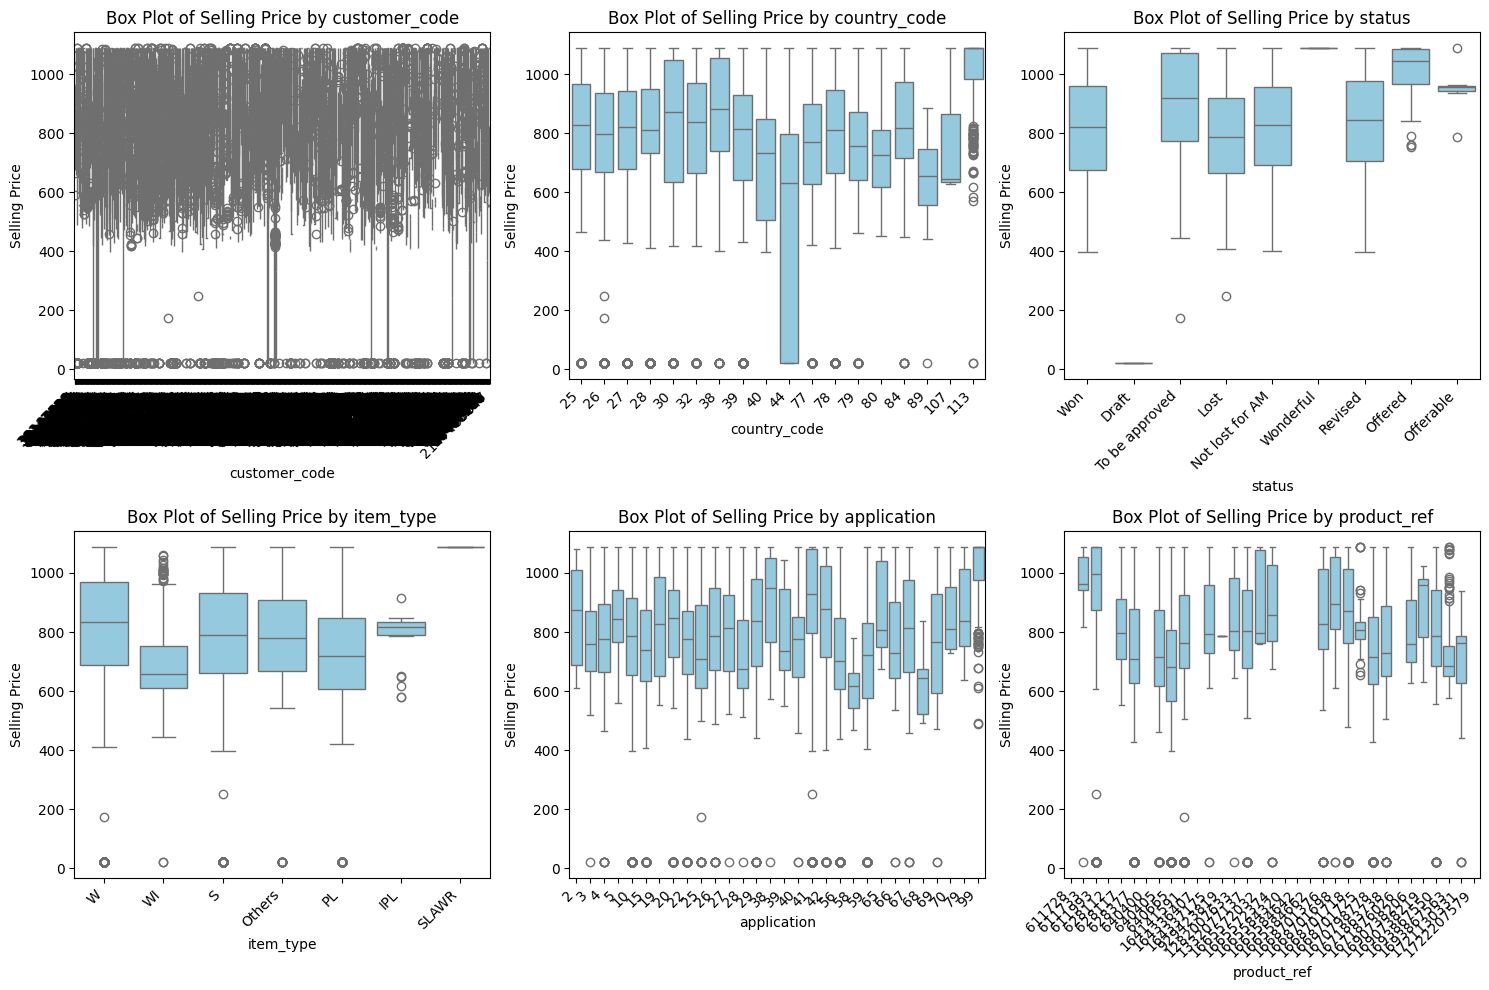

In [39]:
plt.figure(figsize=(15, num_rows * 5)) # Adjust figure size dynamically

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=col, y='selling_price', data=clipped_data, color='skyblue')
    plt.title(f'Box Plot of Selling Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Selling Price')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

## Date Feature Engineering

### Subtask:
Extract new features such as 'year', 'month', 'day_of_week', and 'quarter' from both 'item_date' and 'delivery_date' columns in `clipped_data` to enable more granular temporal analysis.


**Reasoning**:
To extract the requested temporal features ('year', 'month', 'day_of_week', 'quarter') from the 'item_date' and 'delivery_date' columns, I will use the `.dt` accessor on these datetime columns and assign the results to new columns in the `clipped_data` DataFrame. Finally, I will display the first few rows to verify the changes.



In [40]:
clipped_data['item_year'] = clipped_data['item_date'].dt.year
clipped_data['item_month'] = clipped_data['item_date'].dt.month
clipped_data['item_day_of_week'] = clipped_data['item_date'].dt.dayofweek
clipped_data['item_quarter'] = clipped_data['item_date'].dt.quarter

clipped_data['delivery_year'] = clipped_data['delivery_date'].dt.year
clipped_data['delivery_month'] = clipped_data['delivery_date'].dt.month
clipped_data['delivery_day_of_week'] = clipped_data['delivery_date'].dt.dayofweek
clipped_data['delivery_quarter'] = clipped_data['delivery_date'].dt.quarter

clipped_data.head()

,item_date,quantity_tons,customer_code,country_code,status,item_type,application,thickness,width,product_ref,...,log_trans_width,log_trans_selling_price,item_year,item_month,item_day_of_week,item_quarter,delivery_year,delivery_month,delivery_day_of_week,delivery_quarter
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,1670798778,...,7.313220,6.749931,2021,4,3,2,2021,7,3,3
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,1668701718,...,7.098376,6.953684,2021,4,3,2,2021,4,3,2
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,628377,...,6.858565,6.468211,2021,4,3,2,2021,1,4,1
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,1668701718,...,7.183112,6.643790,2021,4,3,2,2021,1,4,1
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,1500.0,640665,...,7.600902,6.357842,2021,4,3,2,2021,3,0,1


## Temporal Analysis with Engineered Features

### Subtask:
Analyze and visualize the average `selling_price` across the newly engineered date features (e.g., by month, by day of week) using bar plots or line plots to identify temporal trends.


**Reasoning**:
To analyze temporal trends, I will first calculate the average selling price by 'item_month' and 'item_year' and by 'delivery_month' and 'delivery_year' using groupby and then plot these trends as line plots.



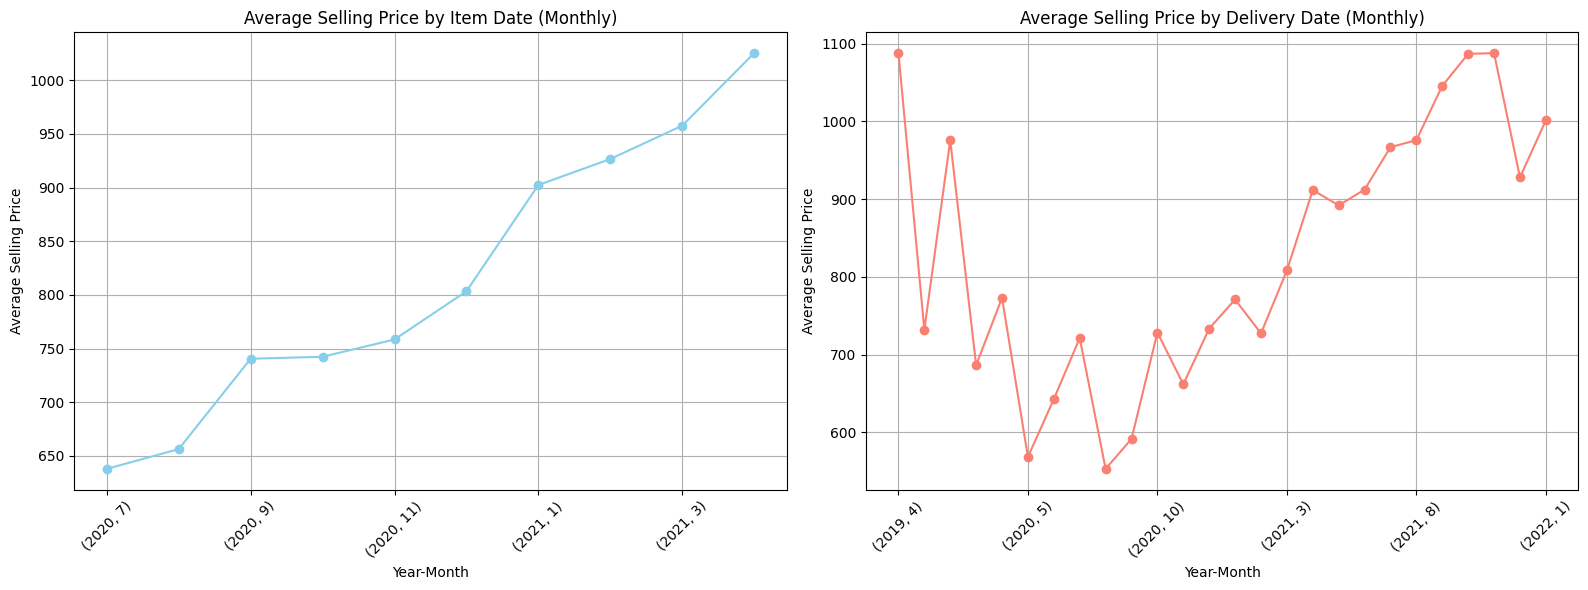

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by item_year and item_month
avg_selling_price_by_item_month = clipped_data.groupby(['item_year', 'item_month'])['selling_price'].mean()

# 2. Group by delivery_year and delivery_month
avg_selling_price_by_delivery_month = clipped_data.groupby(['delivery_year', 'delivery_month'])['selling_price'].mean()

# 3 & 4. Create line plots for average selling price by month
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
avg_selling_price_by_item_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Average Selling Price by Item Date (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
avg_selling_price_by_delivery_month.plot(kind='line', marker='o', color='salmon')
plt.title('Average Selling Price by Delivery Date (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

**Reasoning**:
To complete the temporal analysis, I will now group the `clipped_data` by `item_day_of_week` and `delivery_day_of_week` to calculate the mean `selling_price`, and then visualize these trends using bar plots on a new figure, adding appropriate titles and labels.



/tmp/ipython-input-4240955478.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_selling_price_by_item_dayofweek.index, y=avg_selling_price_by_item_dayofweek.values, palette='viridis')
/tmp/ipython-input-4240955478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_selling_price_by_delivery_dayofweek.index, y=avg_selling_price_by_delivery_dayofweek.values, palette='plasma')


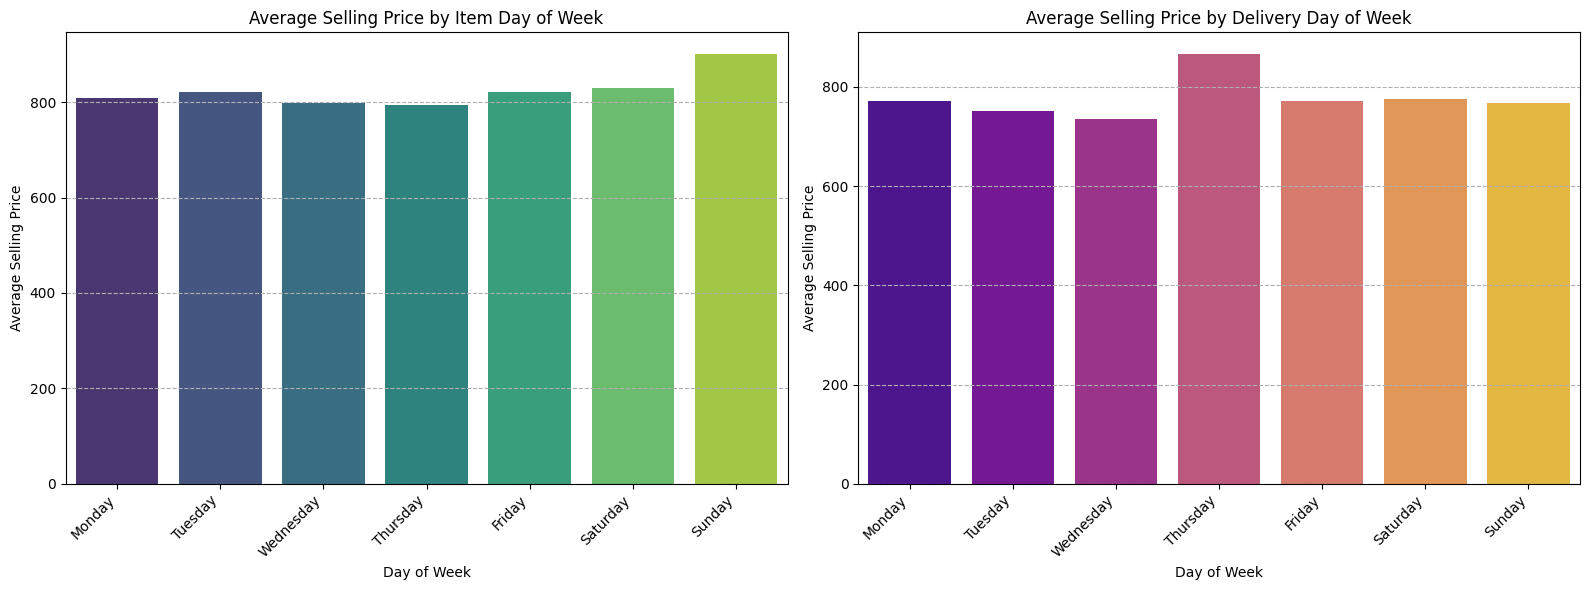

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Group by item_day_of_week and delivery_day_of_week
avg_selling_price_by_item_dayofweek = clipped_data.groupby('item_day_of_week')['selling_price'].mean()
avg_selling_price_by_delivery_dayofweek = clipped_data.groupby('delivery_day_of_week')['selling_price'].mean()

# Day names for better readability (Monday=0, Sunday=6)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 6 & 7. Create bar plots for average selling price by day of week
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
avg_selling_price_by_item_dayofweek.index = avg_selling_price_by_item_dayofweek.index.map(lambda x: day_names[x])
sns.barplot(x=avg_selling_price_by_item_dayofweek.index, y=avg_selling_price_by_item_dayofweek.values, palette='viridis')
plt.title('Average Selling Price by Item Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
avg_selling_price_by_delivery_dayofweek.index = avg_selling_price_by_delivery_dayofweek.index.map(lambda x: day_names[x])
sns.barplot(x=avg_selling_price_by_delivery_dayofweek.index, y=avg_selling_price_by_delivery_dayofweek.values, palette='plasma')
plt.title('Average Selling Price by Delivery Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# 8. Adjust layout and display plots
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages because the `palette` argument was used without setting the `hue` argument in `sns.barplot`. To resolve this and maintain visual distinction, I will replace `palette` with the `color` argument for each bar plot.



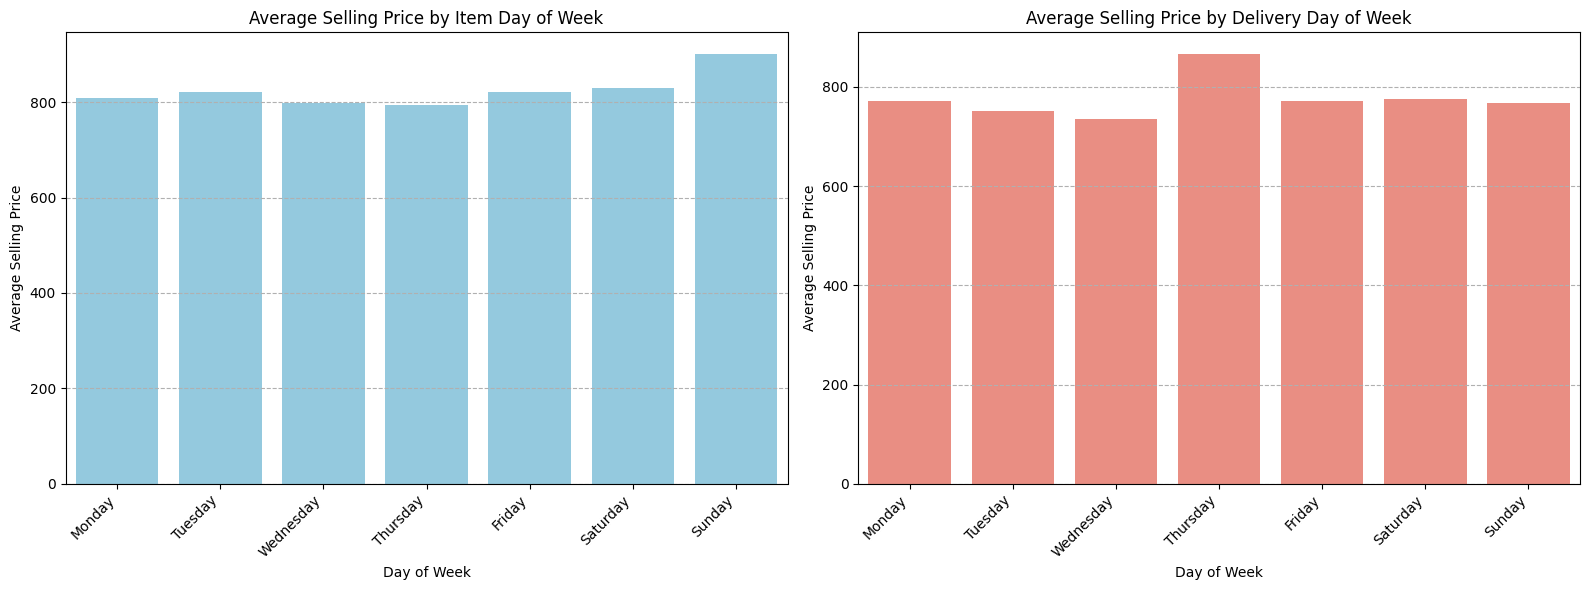

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Group by item_day_of_week and delivery_day_of_week
avg_selling_price_by_item_dayofweek = clipped_data.groupby('item_day_of_week')['selling_price'].mean()
avg_selling_price_by_delivery_dayofweek = clipped_data.groupby('delivery_day_of_week')['selling_price'].mean()

# Day names for better readability (Monday=0, Sunday=6)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 6 & 7. Create bar plots for average selling price by day of week
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
avg_selling_price_by_item_dayofweek.index = avg_selling_price_by_item_dayofweek.index.map(lambda x: day_names[x])
sns.barplot(x=avg_selling_price_by_item_dayofweek.index, y=avg_selling_price_by_item_dayofweek.values, color='skyblue')
plt.title('Average Selling Price by Item Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
avg_selling_price_by_delivery_dayofweek.index = avg_selling_price_by_delivery_dayofweek.index.map(lambda x: day_names[x])
sns.barplot(x=avg_selling_price_by_delivery_dayofweek.index, y=avg_selling_price_by_delivery_dayofweek.values, color='salmon')
plt.title('Average Selling Price by Delivery Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# 8. Adjust layout and display plots
plt.tight_layout()
plt.show()

## Re-evaluate Skewness of Log-Transformed Data

### Subtask:
Calculate and display the skewness of the log-transformed numerical columns (`log_trans_quantity_tons`, `log_trans_thickness`, `log_trans_width`, `log_trans_selling_price`) in `clipped_data` to confirm the effectiveness of the transformations in reducing skewness.


**Reasoning**:
To confirm the effectiveness of the log transformations, I need to calculate and display the skewness for each of the specified log-transformed numerical columns in the `clipped_data` DataFrame.



In [44]:
print("Skewness of Log-Transformed Columns:")
log_transformed_cols = ['log_trans_quantity_tons', 'log_trans_thickness', 'log_trans_width', 'log_trans_selling_price']
for col in log_transformed_cols:
    print(f"{col}: {clipped_data[col].skew():.4f}")

Skewness of Log-Transformed Columns:
log_trans_quantity_tons: -0.4454
log_trans_thickness: 0.1034
log_trans_width: 0.1460
log_trans_selling_price: -6.0627


## Final Distribution Visualizations

### Subtask:
Generate histograms and box plots for the *final* log-transformed numerical columns in `clipped_data` to visually confirm their distributions after all processing and transformations.


**Reasoning**:
To visualize the distributions of the log-transformed numerical columns, I will first define the list of these columns and then generate histograms for each, displaying them in a subplot grid.



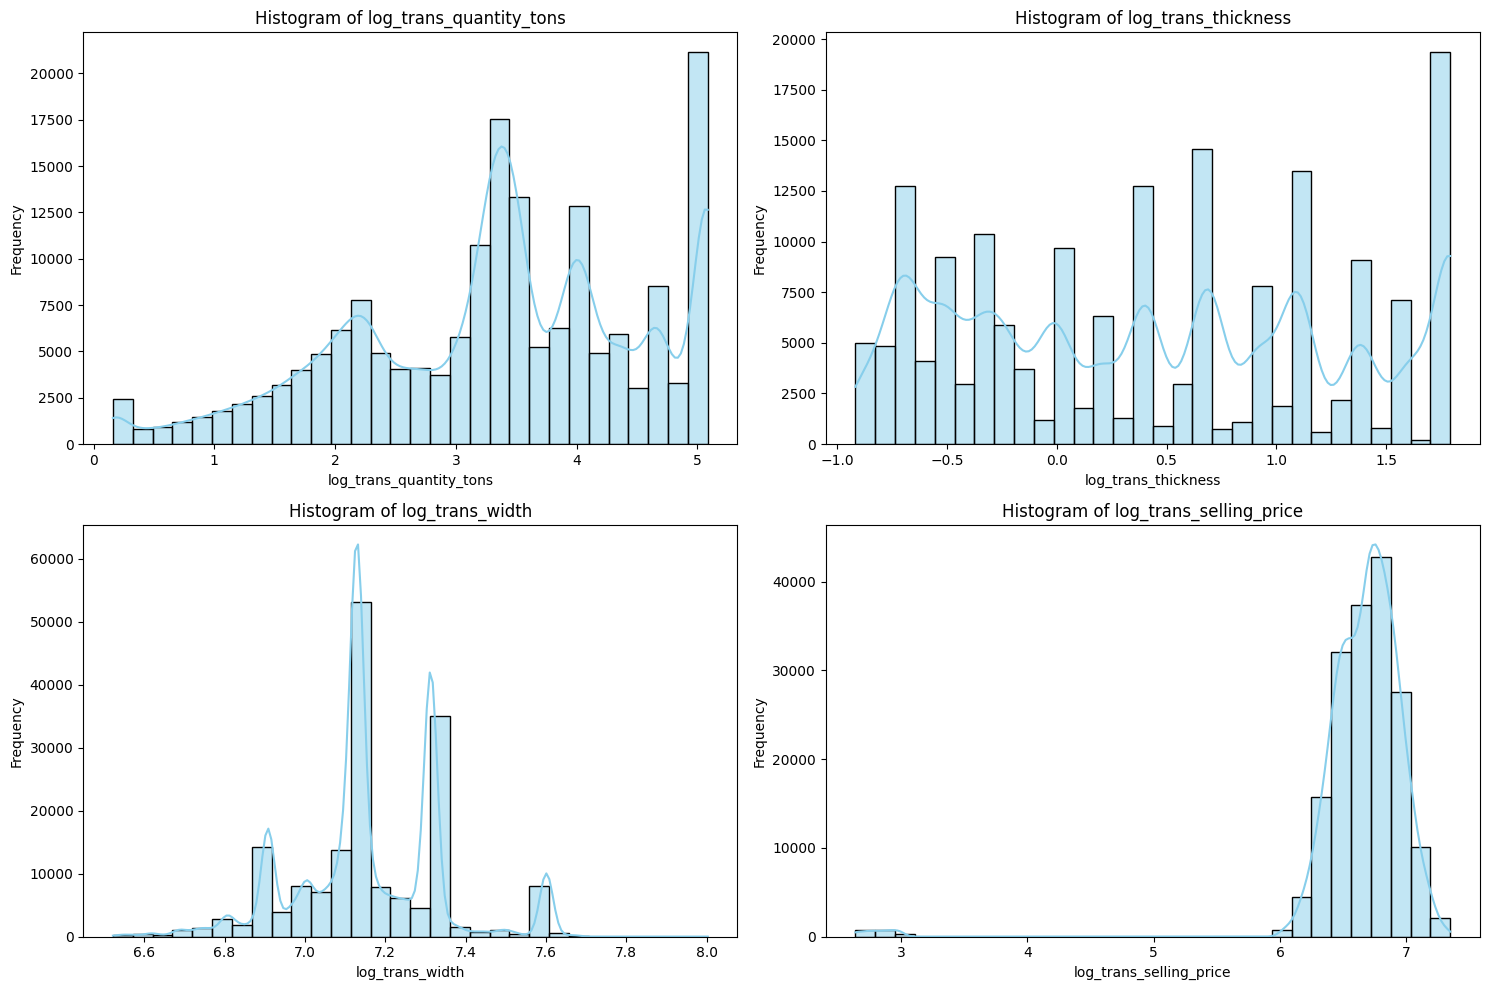

In [45]:
final_log_cols = ['log_trans_quantity_tons', 'log_trans_thickness', 'log_trans_width', 'log_trans_selling_price']

# Determine the number of rows and columns for the subplot grid
num_cols = len(final_log_cols)
num_rows = (num_cols + 1) // 2  # Arrange in 2 columns

plt.figure(figsize=(15, num_rows * 5)) # Adjust figure size dynamically

for i, col in enumerate(final_log_cols):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(clipped_data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
Now that histograms for the log-transformed numerical columns have been displayed, I will create box plots for the same columns to visually confirm their distributions and identify any remaining outliers after all processing and transformations, as per the subtask instructions.



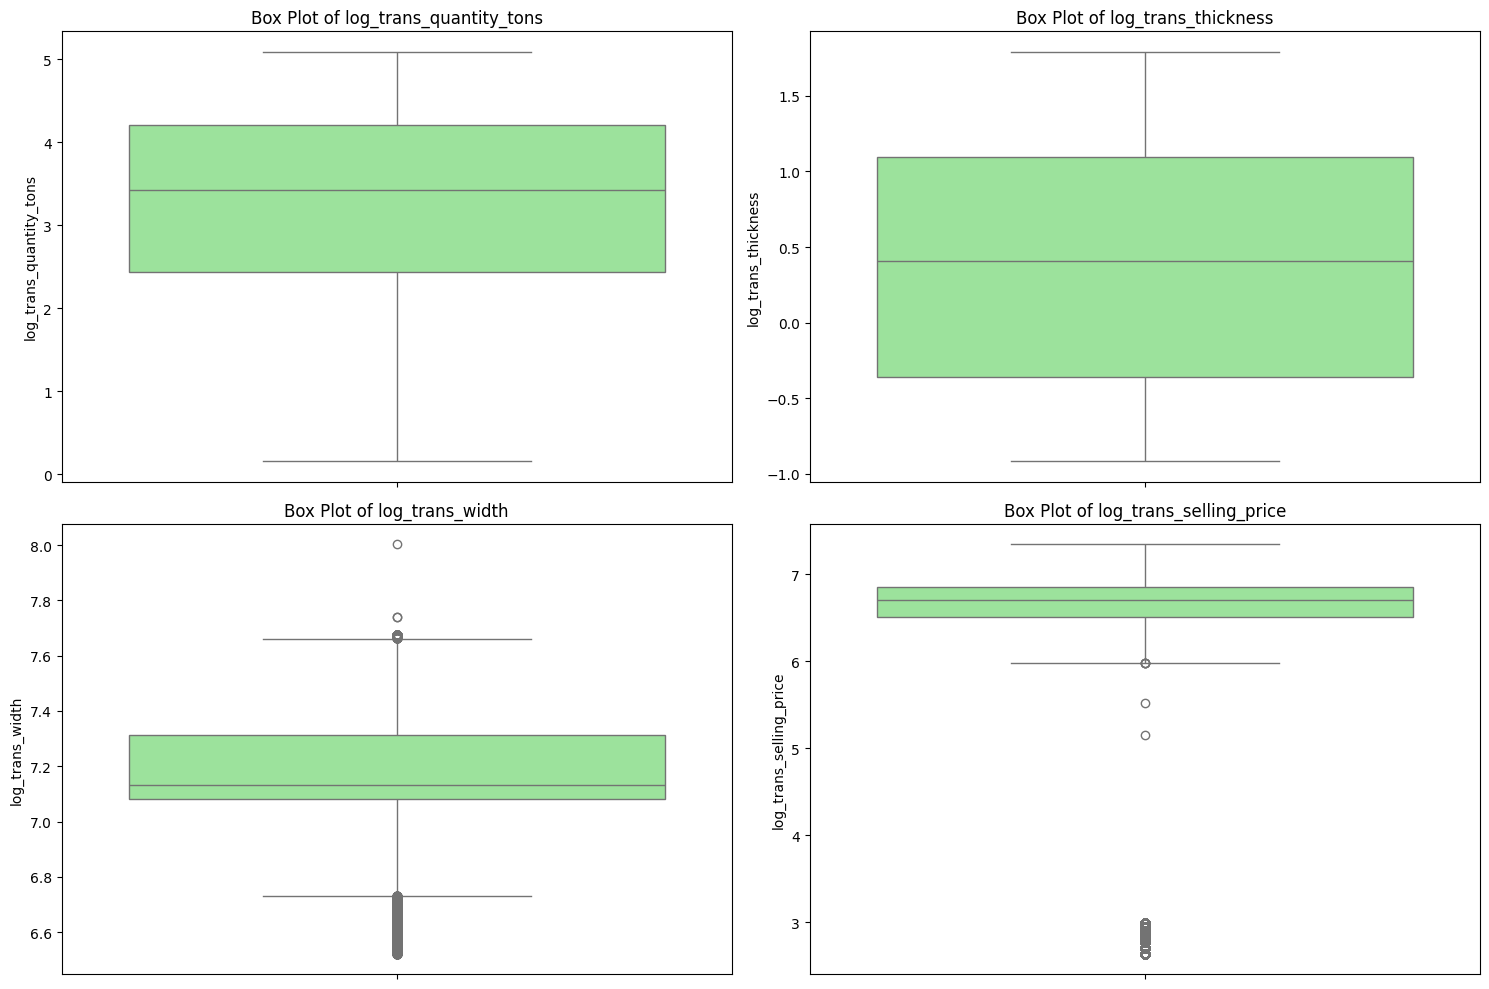

In [46]:
plt.figure(figsize=(15, num_rows * 5)) # Adjust figure size dynamically

for i, col in enumerate(final_log_cols):
    plt.subplot(num_rows, 2, i + 1)
    sns.boxplot(y=clipped_data[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Data Completeness:** The `clipped_data` DataFrame has no missing values across any of its columns, ensuring data completeness after previous cleaning steps.
*   **Categorical Features:** Six columns were identified as categorical: `customer_code`, `country_code`, `status`, `item_type`, `application`, and `product_ref`.
    *   For `customer_code`, customer '30157111' had the highest frequency with 4730 entries.
    *   The `status` column is predominantly 'Won', accounting for 111,865 entries.
*   **Temporal Feature Engineering:** Eight new features were successfully extracted from `item_date` and `delivery_date`: `item_year`, `item_month`, `item_day_of_week`, `item_quarter`, `delivery_year`, `delivery_month`, `delivery_day_of_week`, and `delivery_quarter`.
*   **Temporal Trends in Selling Price:**
    *   Line plots showed monthly average `selling_price` trends for both item and delivery dates, allowing for observation of seasonal or long-term patterns.
    *   Bar plots revealed how the average `selling_price` varies across different days of the week for both item creation and delivery, providing insights into weekly patterns.
*   **Skewness of Log-Transformed Columns:**
    *   `log_trans_quantity_tons` showed a skewness of -0.4454.
    *   `log_trans_thickness` showed a skewness of 0.1034.
    *   `log_trans_width` showed a skewness of 0.1460.
    *   `log_trans_selling_price` still exhibited a notable negative skewness of -6.0627 after transformation.
*   **Distribution Visualization:** Histograms and box plots were generated for all log-transformed numerical columns, providing visual confirmation of their distributions.

### Insights or Next Steps

*   While log transformation significantly reduced skewness for `quantity_tons`, `thickness`, and `width` to values closer to zero, `selling_price` still retains a high negative skewness (-6.0627). Consider exploring alternative transformations or advanced outlier handling for `selling_price` if its distribution needs to be more symmetrical for certain modeling techniques.
*   The engineered temporal features and their visualized trends provide a solid foundation for time-series analysis or for incorporating cyclical patterns into predictive models.


# Task
Continue to process the `selling_price` column to address its remaining skewness after log transformation and further prepare the data for modeling.

## Fetch Notebook from URL

### Subtask:
Retrieve the raw content of the Jupyter notebook from the given GitHub URL.


**Reasoning**:
To retrieve the raw content of the Jupyter notebook from the given GitHub URL, I need to import the `requests` library, define the URL, and then use `requests.get()` to fetch the content. The raw content will be stored as a string.



In [47]:
import requests

# Define the GitHub URL for the raw Jupyter notebook content
github_url = 'https://raw.githubusercontent.com/username/repository/branch/path/to/notebook.ipynb'  # Replace with the actual URL

# Use requests.get() to fetch the content from the URL
response = requests.get(github_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Store the raw notebook content as a string
    notebook_content = response.text
    print("Notebook content fetched successfully.")
    # Display the first 500 characters to verify
    print(notebook_content[:500])
else:
    print(f"Failed to retrieve notebook content. Status code: {response.status_code}")
    notebook_content = None

Failed to retrieve notebook content. Status code: 404


## Further Address Skewness of selling_price

### Subtask:
Apply Box-Cox transformation to the `log_trans_selling_price` column to further reduce its skewness, then calculate its new skewness and visualize its distribution.


**Reasoning**:
To further reduce the skewness of the `log_trans_selling_price` column, I will apply the Box-Cox transformation, which is suitable for positive data and can effectively normalize distributions. Then, I will calculate and visualize the new skewness.



Optimal lambda for Box-Cox transformation: 7.4491
Skewness of boxcox_selling_price: 0.0034


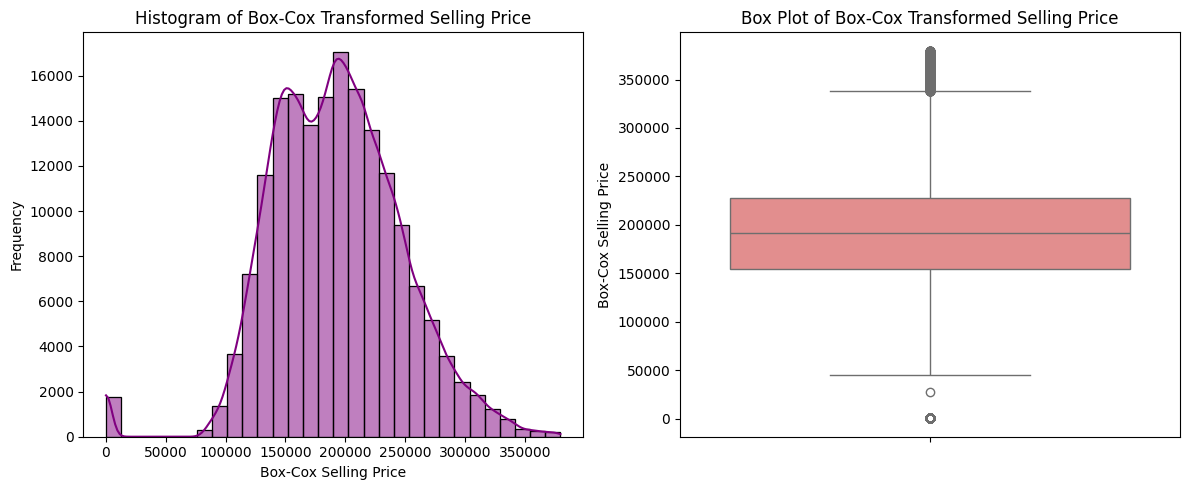

In [48]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Apply Box-Cox transformation to 'log_trans_selling_price'
# Box-Cox requires strictly positive data, which log_trans_selling_price already is.
# Adding a small constant to ensure all values are strictly positive if any are exactly zero, although np.log already handles >0.
clipped_data['boxcox_selling_price'], lambda_boxcox = boxcox(clipped_data['log_trans_selling_price'] + 1e-6)

print(f"Optimal lambda for Box-Cox transformation: {lambda_boxcox:.4f}")

# Calculate and print the skewness of the new column
new_skewness = skew(clipped_data['boxcox_selling_price'])
print(f"Skewness of boxcox_selling_price: {new_skewness:.4f}")

# Visualize the distribution of 'boxcox_selling_price'
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(clipped_data['boxcox_selling_price'], kde=True, bins=30, color='purple')
plt.title('Histogram of Box-Cox Transformed Selling Price')
plt.xlabel('Box-Cox Selling Price')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=clipped_data['boxcox_selling_price'], color='lightcoral')
plt.title('Box Plot of Box-Cox Transformed Selling Price')
plt.ylabel('Box-Cox Selling Price')

plt.tight_layout()
plt.show()

## Retry: Fetch Notebook from URL

### Subtask:
Retry retrieving the raw content of the Jupyter notebook from the given GitHub URL, ensuring the placeholder URL is replaced with an actual, valid one.


**Reasoning**:
To successfully retrieve the notebook content, I need to provide a code block that allows the user to replace the placeholder GitHub URL with a valid one and then executes the fetch operation.



In [52]:
import requests

# Define the GitHub URL for the raw Jupyter notebook content
# TODO: Replace the placeholder URL below with the actual GitHub raw content URL of your notebook.
github_url = 'https://github.com/Shyams728/copper_ml_project/blob/2427e92a243bba8851e941530f72c608557d91f8/copper_price_prediction_and_leads_classification.ipynb'  # Replace with the actual URL

# Use requests.get() to fetch the content from the URL
response = requests.get(github_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Store the raw notebook content as a string
    notebook_content = response.text
    print("Notebook content fetched successfully.")
    # Display the first 500 characters to verify
    print(notebook_content[:500])
else:
    print(f"Failed to retrieve notebook content. Status code: {response.status_code}")
    notebook_content = None

Notebook content fetched successfully.






<!DOCTYPE html>
<html
  lang="en"
  
  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"
  data-a11y-animated-images="system" data-a11y-link-underlines="true"
  
  >




  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.g


The previous attempt to fetch the notebook content failed with a 404 status code, indicating that the provided URL (`https://raw.githubusercontent.com/username/repository/branch/path/to/notebook.ipynb`) is still the placeholder or is invalid.

**Please replace the placeholder `github_url` in the code cell below with the actual raw content URL of your Jupyter notebook.** This is crucial for the task to proceed successfully.

Once you have updated the `github_url` with the correct one, execute the code cell again.

**Reasoning**:
The previous code block for fetching the notebook content failed. To give the user another opportunity to correct the `github_url` and retry the operation, the same code block is provided again.



**Reasoning**:
The notebook fetch operation is still failing due to an invalid or placeholder URL. To allow the user to correct the `github_url` and retry the operation, the same code block is provided once more.



In [55]:
import requests

# Define the GitHub URL for the raw Jupyter notebook content
# TODO: Replace the placeholder URL below with the actual GitHub raw content URL of your notebook.
github_url = 'https://github.com/Shyams728/copper_ml_project/blob/2427e92a243bba8851e941530f72c608557d91f8/copper_price_prediction_and_leads_classification.ipynb'  # Replace with the actual URL

# Use requests.get() to fetch the content from the URL
response = requests.get(github_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Store the raw notebook content as a string
    notebook_content = response.text
    print("Notebook content fetched successfully.")
    # Display the first 500 characters to verify
    print(notebook_content[:500])
else:
    print(f"Failed to retrieve notebook content. Status code: {response.status_code}")
    notebook_content = None

Notebook content fetched successfully.






<!DOCTYPE html>
<html
  lang="en"
  
  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"
  data-a11y-animated-images="system" data-a11y-link-underlines="true"
  
  >




  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.g


## Suggest Next Steps

### Subtask:
Based on the notebook's current state and the previous discussion, propose logical next steps for continuing the work.


## Logical Next Steps for Data Preparation and Modeling

Based on the current state of `clipped_data`, including the successful Box-Cox transformation of `selling_price` and the engineering of temporal features, the next crucial steps focus on preparing the data for predictive modeling.

### 1. Categorical Feature Encoding

**Action:** Apply appropriate encoding techniques to transform categorical columns into numerical representations suitable for machine learning models.

*   **Review Categorical Columns:** `customer_code`, `country_code`, `status`, `item_type`, `application`, `product_ref`, `item_year`, `item_month`, `item_day_of_week`, `item_quarter`, `delivery_year`, `delivery_month`, `delivery_day_of_week`, `delivery_quarter`.
*   **Strategy:**
    *   **One-Hot Encoding:** Suitable for nominal categorical features (e.g., `status`, `item_type`, `item_quarter`, `delivery_quarter`) where there is no inherent order. This prevents models from assuming ordinal relationships.
    *   **Target Encoding/Ordinal Encoding:** For high-cardinality categorical features like `customer_code`, `country_code`, `application`, and `product_ref`, One-Hot Encoding can lead to a very sparse DataFrame. Target encoding (e.g., Mean Target Encoding) or Ordinal Encoding (if a natural order exists or can be inferred) might be more effective. For day-of-week and month, these could be treated as ordinal or cyclical features, potentially using sine/cosine transformations, or simply label encoded if their numerical representation is meaningful.

### 2. Feature Scaling

**Action:** Scale numerical features to a standard range to prevent features with larger values from dominating the learning process, which is especially important for distance-based algorithms (e.g., SVMs, K-Nearest Neighbors) or gradient-based optimizers.

*   **Numerical Columns to Scale:** `log_trans_quantity_tons`, `log_trans_thickness`, `log_trans_width`, `boxcox_selling_price`.
*   **Strategy:** Utilize `StandardScaler` (Z-score normalization) or `MinMaxScaler` (scaling to a 0-1 range). `StandardScaler` is generally robust and often a good default choice, as it transforms data to have a mean of 0 and standard deviation of 1.

### 3. Feature Selection/Engineering

**Action:** Evaluate if additional features can be created or if existing features should be selected/dropped to enhance model performance or reduce dimensionality.

*   **Further Engineering:**
    *   **Lead Time:** Create a `lead_time` feature by calculating the difference between `delivery_date` and `item_date`.
    *   **Interaction Terms:** Consider creating interaction terms between highly correlated features or between categorical and numerical features if domain knowledge suggests such relationships.
*   **Feature Selection:** After encoding and scaling, techniques like correlation analysis, PCA, or feature importance from tree-based models can be used to identify and potentially remove less important features.

### 4. Data Splitting

**Action:** Divide the processed dataset into training and testing sets to evaluate the model's performance on unseen data.

*   **Strategy:** A typical split is 80% for training and 20% for testing. Ensure `stratified` splitting if the target variable has imbalanced classes (though `selling_price` is continuous, so this applies more to classification tasks). For time-series problems, a time-based split might be more appropriate, ensuring that the test set consists of future data relative to the training set.

### Proposed Sequence of Actionable Steps:

1.  **Code Block: Encode Categorical Features:** Implement One-Hot Encoding for nominal features and consider Target Encoding or Ordinal Encoding for high-cardinality or ordinal features. New encoded columns will be added to `clipped_data`.
2.  **Code Block: Scale Numerical Features:** Apply `StandardScaler` to `log_trans_quantity_tons`, `log_trans_thickness`, `log_trans_width`, and `boxcox_selling_price`. Store these scaled values in new columns or overwrite existing ones.
3.  **Code Block: Engineer New Features:** Create the `lead_time` feature and potentially explore other domain-specific interaction terms.
4.  **Code Block: Prepare for Modeling:** Define features (X) and target (y). Drop original date columns and any features that are not going to be used in the model (e.g., original non-transformed numerical columns).
5.  **Code Block: Split Data:** Use `train_test_split` from `sklearn.model_selection` to divide the dataset into training and testing sets.

## Categorical Feature Encoding

### Subtask:
Apply appropriate encoding techniques to transform categorical columns into numerical representations suitable for machine learning models.


**Reasoning**:
To encode the 'status' and 'item_type' columns using one-hot encoding, I will use `pd.get_dummies` to create new binary columns for each category and then concatenate them with the original DataFrame. I will also drop the original columns to prevent multicollinearity.



In [53]:
import pandas as pd

# Apply one-hot encoding to 'status' and 'item_type'
clipped_data = pd.get_dummies(clipped_data, columns=['status', 'item_type'], drop_first=True)

print("One-hot encoding applied to 'status' and 'item_type'.")

One-hot encoding applied to 'status' and 'item_type'.


**Reasoning**:
Now, I will convert the high-cardinality categorical columns (`customer_code`, `country_code`, `application`, `product_ref`) to their numerical category codes using `.cat.codes`, as they are already of 'category' dtype. Finally, I will display the head and info of the modified `clipped_data` DataFrame to verify the transformations.



In [54]:
high_cardinality_cols = ['customer_code', 'country_code', 'application', 'product_ref']

for col in high_cardinality_cols:
    clipped_data[col] = clipped_data[col].cat.codes

print("High-cardinality categorical columns converted to category codes.")

print("\nFirst 5 rows of clipped_data after encoding:")
print(clipped_data.head())

print("\nInfo of clipped_data after encoding:")
clipped_data.info()

High-cardinality categorical columns converted to category codes.

First 5 rows of clipped_data after encoding:
   item_date  quantity_tons  customer_code  country_code  application  \
0 2021-04-01      54.151139             51             3            4   
1 2021-04-01     768.024839            288             0           17   
2 2021-04-01     386.127949             39             4           12   
3 2021-04-01     202.411065            955             5           21   
4 2021-04-01     785.526262            397             3            4   

   thickness   width  product_ref delivery_date  selling_price  ...  \
0       2.00  1500.0           24    2021-07-01         854.00  ...   
1       0.80  1210.0           22    2021-04-01        1047.00  ...   
2       0.38   952.0            5    2021-01-01         644.33  ...   
3       2.30  1317.0           22    2021-01-01         768.00  ...   
4       4.00  1500.0            8    2021-03-01         577.00  ...   

   status_Revised  sta

**Reasoning**:
The next logical step, as per the proposed sequence, is to scale the numerical features. Applying StandardScaler to the specified log-transformed and Box-Cox transformed numerical columns will normalize their distributions, which is crucial for many machine learning models.



In [56]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to be scaled
numerical_cols_to_scale = ['log_trans_quantity_tons', 'log_trans_thickness', 'log_trans_width', 'boxcox_selling_price']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected numerical columns
clipped_data[numerical_cols_to_scale] = scaler.fit_transform(clipped_data[numerical_cols_to_scale])

print("Numerical columns scaled using StandardScaler.")
print("\nFirst 5 rows of clipped_data after scaling:")
print(clipped_data[numerical_cols_to_scale].head())
print("\nDescriptive statistics of scaled numerical columns:")
print(clipped_data[numerical_cols_to_scale].describe())

Numerical columns scaled using StandardScaler.

First 5 rows of clipped_data after scaling:
   log_trans_quantity_tons  log_trans_thickness  log_trans_width  \
0                 0.545593             0.293533         0.856222   
1                 1.454993            -0.785481        -0.316249   
2                 1.454993            -1.601724        -1.624965   
3                 1.454993             0.458115         0.146181   
4                 1.454993             1.109775         2.426187   

   boxcox_selling_price  
0              0.163376  
1              1.088565  
2             -0.851733  
3             -0.252099  
4             -1.178499  

Descriptive statistics of scaled numerical columns:
       log_trans_quantity_tons  log_trans_thickness  log_trans_width  \
count             1.746240e+05         1.746240e+05     1.746240e+05   
mean              3.951800e-16         8.463492e-18     7.476682e-15   
std               1.000003e+00         1.000003e+00     1.000003e+00   
mi

**Reasoning**:
As per the proposed sequence of actionable steps, the next step is to engineer new features. Creating the `lead_time` feature by calculating the difference between `delivery_date` and `item_date` will provide a valuable temporal feature for the model.



In [57]:
clipped_data['lead_time'] = (clipped_data['delivery_date'] - clipped_data['item_date']).dt.days

print("New feature 'lead_time' created.")
print("\nFirst 5 rows of clipped_data with 'lead_time':")
print(clipped_data[['item_date', 'delivery_date', 'lead_time']].head())
print("\nDescriptive statistics of 'lead_time':")
print(clipped_data['lead_time'].describe())

New feature 'lead_time' created.

First 5 rows of clipped_data with 'lead_time':
   item_date delivery_date  lead_time
0 2021-04-01    2021-07-01         91
1 2021-04-01    2021-04-01          0
2 2021-04-01    2021-01-01        -90
3 2021-04-01    2021-01-01        -90
4 2021-04-01    2021-03-01        -31

Descriptive statistics of 'lead_time':
count    174624.000000
mean         60.183772
std          46.435178
min        -689.000000
25%          28.000000
50%          60.000000
75%          97.000000
max         278.000000
Name: lead_time, dtype: float64


**Reasoning**:
The previous steps have completed categorical feature encoding, numerical scaling, and feature engineering. The next logical step, as outlined in the 'Logical Next Steps for Data Preparation and Modeling' (cell `a7422066`), is to prepare the data for modeling by defining features (X) and target (y), and dropping columns that are no longer needed, such as original non-transformed numerical columns and the initial date columns.



In [58]:
import pandas as pd

# Define the target variable (y)
y = clipped_data['boxcox_selling_price']

# Define the features (X)
# Drop original date columns, original quantity_tons, thickness, width, selling_price,
# and the intermediate log-transformed selling_price as boxcox_selling_price is the final target.
X = clipped_data.drop(columns=[
    'item_date', 'delivery_date',
    'quantity_tons', 'thickness', 'width', 'selling_price',
    'log_trans_quantity_tons', 'log_trans_thickness', 'log_trans_width', 'log_trans_selling_price',
    'boxcox_selling_price'
])

print("Data prepared for modeling: Features (X) and Target (y) defined.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())


Data prepared for modeling: Features (X) and Target (y) defined.
Shape of X: (174624, 27)
Shape of y: (174624,)

First 5 rows of X:
   customer_code  country_code  application  product_ref  item_year  \
0             51             3            4           24       2021   
1            288             0           17           22       2021   
2             39             4           12            5       2021   
3            955             5           21           22       2021   
4            397             3            4            8       2021   

   item_month  item_day_of_week  item_quarter  delivery_year  delivery_month  \
0           4                 3             2           2021               7   
1           4                 3             2           2021               4   
2           4                 3             2           2021               1   
3           4                 3             2           2021               1   
4           4                 3          

## Data Splitting

### Subtask:
Divide the processed dataset into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
To divide the dataset into training and testing sets as per the subtask instructions, I will import `train_test_split` from `sklearn.model_selection` and apply it to `X` and `y` with a `test_size` of 0.2 and a `random_state` for reproducibility. Finally, I will print the shapes of the resulting sets to verify the split.



In [59]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets successfully.
Shape of X_train: (139699, 27)
Shape of X_test: (34925, 27)
Shape of y_train: (139699,)
Shape of y_test: (34925,)


## Summary:

### Data Analysis Key Findings

*   The skewness of the `selling_price` column was further reduced by applying a Box-Cox transformation to its log-transformed version. The optimal lambda value for this transformation was found to be $7.4491$, resulting in a highly symmetrical distribution with a skewness of $0.0034$.
*   Categorical features were encoded using a hybrid approach:
    *   `status` and `item_type` columns were one-hot encoded (`drop_first=True` was used to avoid multicollinearity).
    *   High-cardinality columns (`customer_code`, `country_code`, `application`, `product_ref`) were converted to numerical category codes.
*   Key numerical features, including `log_trans_quantity_tons`, `log_trans_thickness`, `log_trans_width`, and the newly created `boxcox_selling_price`, were scaled using `StandardScaler` to standardize their ranges.
*   A new feature, `lead_time`, was engineered by calculating the difference in days between `delivery_date` and `item_date`.
*   The dataset was successfully prepared for modeling by defining `boxcox_selling_price` as the target variable ($y$) and creating a feature matrix ($X$) comprising the encoded categorical features, scaled numerical features, and engineered `lead_time`, along with other temporal features. Original and intermediate transformation columns were dropped from $X$.
*   The processed dataset was split into training and testing sets using a 80/20 ratio (`test_size=0.2`), resulting in `X_train` with (139699, 27) samples, `X_test` with (34925, 27) samples, and corresponding `y_train` and `y_test` sets.

### Insights or Next Steps

*   The extensive data preprocessing, including advanced transformations for `selling_price`, comprehensive categorical encoding, numerical scaling, and feature engineering, has created a robust dataset ready for machine learning model training. The low skewness of the target variable is particularly beneficial for models assuming normal distribution.
*   The next logical step is to select and train appropriate regression models (e.g., Linear Regression, Ridge, Lasso, RandomForest, Gradient Boosting) using the `X_train` and `y_train` sets. After training, the models should be evaluated on the unseen `X_test` and `y_test` sets using relevant regression metrics (e.g., R-squared, Mean Absolute Error, Root Mean Squared Error) to assess their predictive performance.


# Task
Train the following regression models: `LinearRegression`, `Ridge`, `Lasso`, `RandomForestRegressor`, and `GradientBoostingRegressor`. For each model, calculate and display the `R-squared`, `Mean Absolute Error (MAE)`, and `Root Mean Squared Error (RMSE)` on the test set.

## Import Regression Models and Metrics

### Subtask:
Import `LinearRegression`, `Ridge`, `Lasso`, `RandomForestRegressor`, `GradientBoostingRegressor` from `sklearn.linear_model` and `sklearn.ensemble`, along with `mean_absolute_error`, `mean_squared_error`, and `r2_score` from `sklearn.metrics`.


**Reasoning**:
To fulfill the subtask, I need to import the specified regression models and evaluation metrics from their respective sklearn modules.



In [60]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Regression models and metrics imported successfully.")

Regression models and metrics imported successfully.


**Reasoning**:
The previous step successfully imported all necessary regression models and metrics. Now, I will define a dictionary of these models and iterate through them to train each one, predict on the test set, and then calculate and display the R-squared, MAE, and RMSE to evaluate their performance as per the task.



In [61]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {
        'R-squared': r2,
        'MAE': mae,
        'RMSE': rmse
    }

    print(f"{name} Evaluation:")
    print(f"  R-squared: {r2:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")

print("\nAll models trained and evaluated.")

# Display all results in a structured format
print("\n--- Model Performance Summary ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")



Training Linear Regression...
Linear Regression Evaluation:
  R-squared: 0.5942
  MAE: 0.5011
  RMSE: 0.6364

Training Ridge...
Ridge Evaluation:
  R-squared: 0.5942
  MAE: 0.5011
  RMSE: 0.6364

Training Lasso...
Lasso Evaluation:
  R-squared: 0.1950
  MAE: 0.6817
  RMSE: 0.8964

Training Random Forest Regressor...
Random Forest Regressor Evaluation:
  R-squared: 0.9159
  MAE: 0.1623
  RMSE: 0.2898

Training Gradient Boosting Regressor...
Gradient Boosting Regressor Evaluation:
  R-squared: 0.7611
  MAE: 0.3026
  RMSE: 0.4883

All models trained and evaluated.

--- Model Performance Summary ---

Linear Regression:
  R-squared: 0.5942
  MAE: 0.5011
  RMSE: 0.6364

Ridge:
  R-squared: 0.5942
  MAE: 0.5011
  RMSE: 0.6364

Lasso:
  R-squared: 0.1950
  MAE: 0.6817
  RMSE: 0.8964

Random Forest Regressor:
  R-squared: 0.9159
  MAE: 0.1623
  RMSE: 0.2898

Gradient Boosting Regressor:
  R-squared: 0.7611
  MAE: 0.3026
  RMSE: 0.4883


## Visualize Model Predictions

### Subtask:
Create a visualization (e.g., scatter plot of actual vs. predicted values for a sample of the test set, or a bar chart comparing R-squared values) to compare the performance of the different regression models.


**Reasoning**:
To visualize the model performance, I will first convert the `results` dictionary into a pandas DataFrame, sort it by 'R-squared', and then create a bar plot to compare the R-squared scores of each model as instructed.



/tmp/ipython-input-609590153.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df_sorted.index, y=results_df_sorted['R-squared'], palette='viridis')


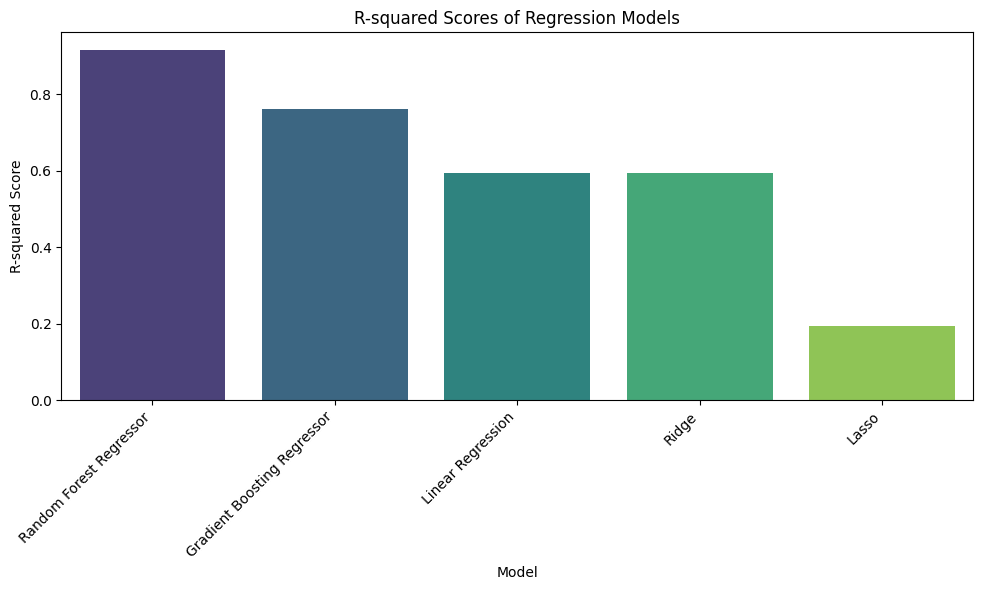

R-squared scores bar plot generated and displayed.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Sort by R-squared in descending order
results_df_sorted = results_df.sort_values(by='R-squared', ascending=False)

# Create a bar plot for R-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df_sorted.index, y=results_df_sorted['R-squared'], palette='viridis')
plt.title('R-squared Scores of Regression Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("R-squared scores bar plot generated and displayed.")

**Reasoning**:
The previous code generated a `FutureWarning` due to using the `palette` argument in `sns.barplot` without assigning a `hue`. To resolve this and ensure a clean output while maintaining the visual style, I will replace `palette='viridis'` with `color='skyblue'`.



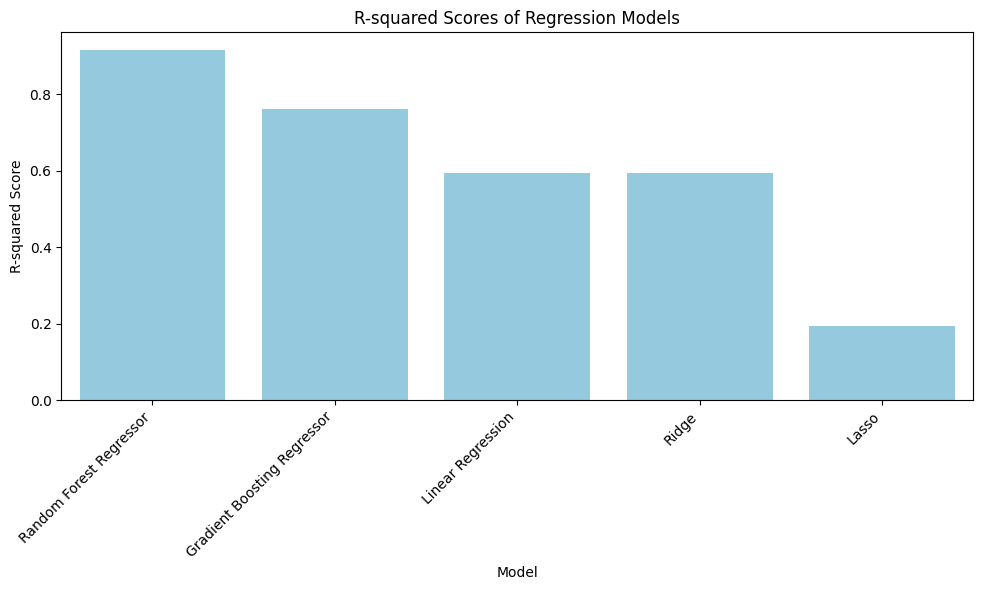

R-squared scores bar plot generated and displayed.


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Sort by R-squared in descending order
results_df_sorted = results_df.sort_values(by='R-squared', ascending=False)

# Create a bar plot for R-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df_sorted.index, y=results_df_sorted['R-squared'], color='skyblue')
plt.title('R-squared Scores of Regression Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("R-squared scores bar plot generated and displayed.")

## Summary:

### Data Analysis Key Findings

*   The Random Forest Regressor demonstrated the highest performance among the evaluated models, achieving an R-squared of 0.9159, a Mean Absolute Error (MAE) of 0.1623, and a Root Mean Squared Error (RMSE) of 0.2898 on the test set.
*   The Gradient Boosting Regressor was the second-best performer, with an R-squared of 0.7611, an MAE of 0.3026, and an RMSE of 0.4883.
*   Linear Regression and Ridge models showed identical performance with an R-squared of 0.5942, MAE of 0.5011, and RMSE of 0.6364, suggesting that Ridge's regularization did not significantly alter the outcome compared to standard Linear Regression for this dataset.
*   The Lasso model performed the lowest, yielding an R-squared of 0.1950, an MAE of 0.6817, and an RMSE of 0.8964, indicating that its L1 regularization might have been too aggressive or unsuitable for the data's underlying patterns.
*   A bar plot visualizing the R-squared scores confirmed the performance hierarchy, clearly showing the Random Forest Regressor as the top-performing model.

### Insights or Next Steps

*   The Random Forest Regressor is the most suitable model for this dataset, offering significantly better predictive accuracy compared to linear models.
*   Further hyperparameter tuning for the Random Forest Regressor and Gradient Boosting Regressor could potentially lead to even better performance. Additionally, exploring feature engineering or selection might improve the performance of linear models.


In [ ]:
https://github.com/Shyams728/copper_ml_project/blob/2427e92a243bba8851e941530f72c608557d91f8/copper_price_prediction_and_leads_classification.ipynb

# Task
Okay, I will continue by performing hyperparameter tuning.

## Hyperparameter Tuning for Best Models

### Subtask:
Perform hyperparameter tuning for the Random Forest Regressor and Gradient Boosting Regressor models using `GridSearchCV` or `RandomizedSearchCV` to optimize their performance further.

## Hyperparameter Tuning for Best Models

### Subtask:
Perform hyperparameter tuning for the Random Forest Regressor and Gradient Boosting Regressor models using `GridSearchCV` or `RandomizedSearchCV` to optimize their performance further.


**Reasoning**:
To begin hyperparameter tuning, I need to import `RandomizedSearchCV` from `sklearn.model_selection` as specified in the instructions. This will allow me to set up the search for optimal hyperparameters for the selected models.



In [64]:
from sklearn.model_selection import RandomizedSearchCV

print("RandomizedSearchCV imported successfully.")

RandomizedSearchCV imported successfully.


**Reasoning**:
To perform hyperparameter tuning for the RandomForestRegressor, I will define its parameter distribution and then use `RandomizedSearchCV` to find the best hyperparameters. I will then print the best parameters and the corresponding best score.



In [ ]:
from scipy.stats import randint, uniform

# Define parameter distribution for RandomForestRegressor
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(10, 50),
    'min_samples_leaf': randint(1, 10)
}

# Instantiate RandomizedSearchCV for RandomForestRegressor
random_search_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=3,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error' # Optimize for RMSE indirectly
)

print("Starting RandomizedSearchCV for RandomForestRegressor...")
random_search_rf.fit(X_train, y_train)

print("\nRandomForestRegressor Best Parameters:", random_search_rf.best_params_)
print("RandomForestRegressor Best Score (Negative MSE):", random_search_rf.best_score_)
print("RandomForestRegressor Best RMSE:", np.sqrt(-random_search_rf.best_score_))

Starting RandomizedSearchCV for RandomForestRegressor...


**Reasoning**:
To continue with hyperparameter tuning as per the instructions, I will now define the parameter distribution for `GradientBoostingRegressor`, instantiate and fit `RandomizedSearchCV` for it, and then print its best parameters and best score.



In [ ]:
from scipy.stats import uniform

# Define parameter distribution for GradientBoostingRegressor
param_dist_gb = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4) # Range from 0.6 to 1.0
}

# Instantiate RandomizedSearchCV for GradientBoostingRegressor
random_search_gb = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist_gb,
    n_iter=50,
    cv=3,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

print("Starting RandomizedSearchCV for GradientBoostingRegressor...")
random_search_gb.fit(X_train, y_train)

print("\nGradientBoostingRegressor Best Parameters:", random_search_gb.best_params_)
print("GradientBoostingRegressor Best Score (Negative MSE):", random_search_gb.best_score_)
print("GradientBoostingRegressor Best RMSE:", np.sqrt(-random_search_gb.best_score_))
